# Final Project

# A. Introduction


**a.It is recommended that you complete the introduction after you have finished all the other parts.**


Ok.

**b. State whether you solved your project as a regression or classification problem.**

Regression problem.

**c.The general proposal comments including instructions for how to convert a regression problem to a classification problem if that is what you are interested in working on.**

Ok.

**d.Describe the major findings you have identified based on your analysis.**

The linear regression models using all Continuous inputs with linear additive features would be the best model for the spotify songs data set in 2004.

**e.Which inputs/features seem to influence the response/outcome the most?**

Model 2: energy and loudness.

**f.What supported your conclusion? Was it only through predictive models?**

The cross validation results supported my conclusion, not only through the predictive models.

**g.Could EDA help identify similar trends/relationships?**

Yes, the trends (negative or positive) via EDA were consistent with that from params of model 2.

**h.Was clustering consistent with any conclusions from the predictive models?**

I am not so sure but the distribution of energy-track_popularity group by hierarchy clusters are similar with that of loudness-track_popularity. This is consistent with the linear additive features energy and loudness.

**i.What skills did you learn from going through this project?**

The concepts of 

1.Exploratory data analysis with fancy visualization methods. 

2.Two main areas in unsupervised learning(data discovery): clustering, to find similar subgroups within the data and dimensional reduction, to create a few new variables to represent/explain original data. 

3.Part of performing supervised learning(predictive analytics): Fitting and predicting models, performance metrics, cross-validations.

**j.This is not related to application or project inputs/outputs directly. What general skills can you take away from the project to apply to applications more specific to your area of interest?**

The visualization skills could be the most direct taken-away to my work major in clinical pharmaceutical studies. Besides, The logistic regression for Binary classification could also be utilized with clinical data.

# B. EDA

## a.Basic Information

### Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

### Read data

In [5]:
data_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'

In [6]:
df = pd.read_csv(data_url)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

1.Show the number of rows and columns

In [8]:
df.shape

(32833, 23)

2.The variable names

3.The data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

4.Number of missing values per variable

In [10]:
df.isna().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

5.Number of unique values per variable

In [11]:
df.nunique()

track_id                    28356
track_name                  23449
track_artist                10692
track_popularity              101
track_album_id              22545
track_album_name            19743
track_album_release_date     4530
playlist_name                 449
playlist_id                   471
playlist_genre                  6
playlist_subgenre              24
danceability                  822
energy                        952
key                            12
loudness                    10222
mode                            2
speechiness                  1270
acousticness                 3731
instrumentalness             4729
liveness                     1624
valence                      1362
tempo                       17684
duration_ms                 19785
dtype: int64

### Modify data

In [12]:
# modify 1.drop missing as shown in B.b.iii
df1 = df.dropna()

The impact of dropping missing data has been explored in EDA.

In [13]:
# modify 2.remove duplicate as stated in CMPINF 2100 - Final project feedback
df2 = df1.groupby(['track_id','track_album_id','playlist_id'],as_index=False).first()

In [14]:
df2.shape == df1.shape

False

In [15]:
# modify 3.transfer DATE variable as stated in CMPINF 2100 - Final project feedback
df2['track_album_release_date_dt'] = pd.to_datetime(df2.track_album_release_date,format='%Y-%m-%d', errors='coerce')

In [16]:
df2['release_year'] = df2.track_album_release_date_dt.dt.year

In [17]:
df2.columns

Index(['track_id', 'track_album_id', 'playlist_id', 'track_name',
       'track_artist', 'track_popularity', 'track_album_name',
       'track_album_release_date', 'playlist_name', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'track_album_release_date_dt',
       'release_year'],
      dtype='object')

In [18]:
# modify 4.transfer track_popularity in a regression problem as stated in CMPINF 2100 - Final project feedback
df2['track_pop_shift'] = np.where(df2.track_popularity == 100, df2.track_popularity - 0.1,df2.track_popularity)
df2['track_pop_shift'] = np.where(df2.track_popularity == 0, df2.track_popularity + 0.1,df2.track_popularity)

In [19]:
df2['track_pop_frac']=df2.track_pop_shift / 100

df2['y'] =np.log(df2.track_pop_frac / (1 - df2.track_pop_frac))

In [20]:
df2.columns

Index(['track_id', 'track_album_id', 'playlist_id', 'track_name',
       'track_artist', 'track_popularity', 'track_album_name',
       'track_album_release_date', 'playlist_name', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'track_album_release_date_dt',
       'release_year', 'track_pop_shift', 'track_pop_frac', 'y'],
      dtype='object')

In [21]:
# modify 5.split and choose part of the dataframe that I was interested in.
df3 = df2.loc[df2.release_year == 2004, :]

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 148 to 32181
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   track_id                     328 non-null    object        
 1   track_album_id               328 non-null    object        
 2   playlist_id                  328 non-null    object        
 3   track_name                   328 non-null    object        
 4   track_artist                 328 non-null    object        
 5   track_popularity             328 non-null    int64         
 6   track_album_name             328 non-null    object        
 7   track_album_release_date     328 non-null    object        
 8   playlist_name                328 non-null    object        
 9   playlist_genre               328 non-null    object        
 10  playlist_subgenre            328 non-null    object        
 11  danceability                 328 non-null    f

In [23]:
df3.isna().sum()

track_id                       0
track_album_id                 0
playlist_id                    0
track_name                     0
track_artist                   0
track_popularity               0
track_album_name               0
track_album_release_date       0
playlist_name                  0
playlist_genre                 0
playlist_subgenre              0
danceability                   0
energy                         0
key                            0
loudness                       0
mode                           0
speechiness                    0
acousticness                   0
instrumentalness               0
liveness                       0
valence                        0
tempo                          0
duration_ms                    0
track_album_release_date_dt    0
release_year                   0
track_pop_shift                0
track_pop_frac                 0
y                              0
dtype: int64

In [24]:
df3.nunique()

track_id                       300
track_album_id                 186
playlist_id                    119
track_name                     285
track_artist                   157
track_popularity                70
track_album_name               166
track_album_release_date        77
playlist_name                  116
playlist_genre                   6
playlist_subgenre               20
danceability                   238
energy                         241
key                             12
loudness                       291
mode                             2
speechiness                    244
acousticness                   268
instrumentalness               151
liveness                       231
valence                        244
tempo                          293
duration_ms                    288
track_album_release_date_dt     77
release_year                     1
track_pop_shift                 70
track_pop_frac                  70
y                               70
dtype: int64

In [25]:
df3.key.value_counts()

key
1     42
11    35
7     31
6     30
9     27
4     27
2     27
0     26
5     25
10    25
8     23
3     10
Name: count, dtype: int64

In [26]:
df3['mode'].value_counts()

mode
1    175
0    153
Name: count, dtype: int64

In [27]:
df3.playlist_genre.value_counts()

playlist_genre
rap      85
r&b      84
rock     75
latin    63
pop      18
edm       3
Name: count, dtype: int64

In [28]:
df3.loudness

148      -8.753
853      -5.705
1045    -10.624
1046    -10.624
1083     -5.151
          ...  
32114    -4.852
32134    -7.185
32143    -4.301
32160    -7.478
32181    -7.161
Name: loudness, Length: 328, dtype: float64

## b.Visualization

1.Counts of categorical variables

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


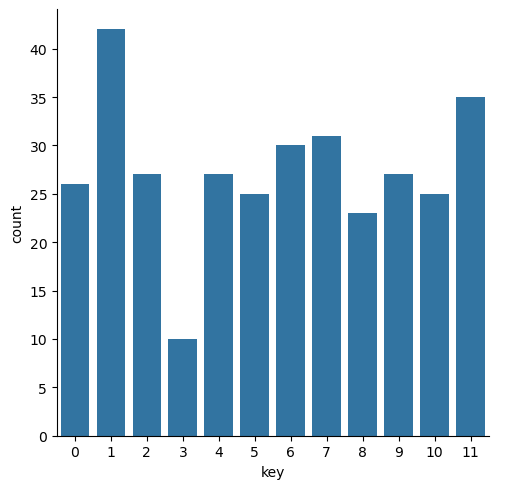

In [29]:
#key
sns.catplot(data=df3,x='key',kind='count' )
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


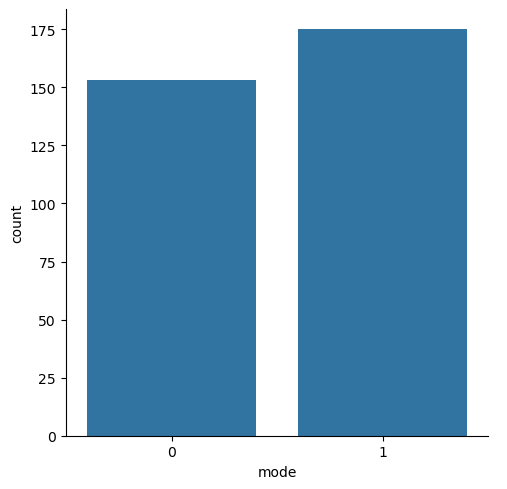

In [30]:
#mode
sns.catplot(data=df3,x='mode',kind='count' )
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


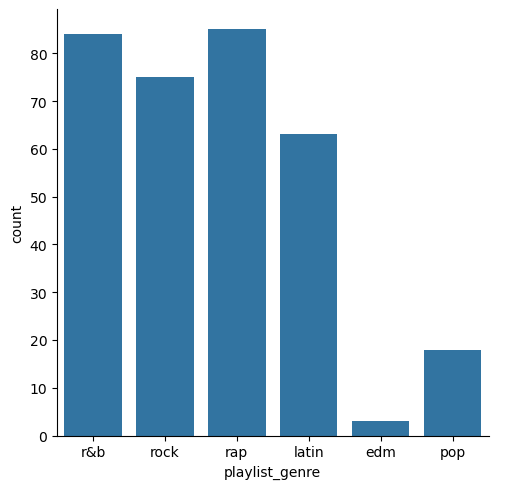

In [31]:
#playlist_genre
sns.catplot(data=df3,x='playlist_genre',kind='count')
plt.show()

2.Distributions of continuous variables

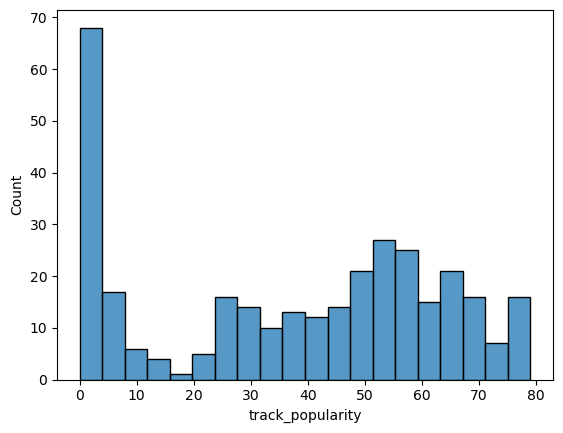

In [32]:
#track_popularity
fig, ax=plt.subplots()
sns.histplot(data=df3, x='track_popularity',bins=20,ax=ax)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


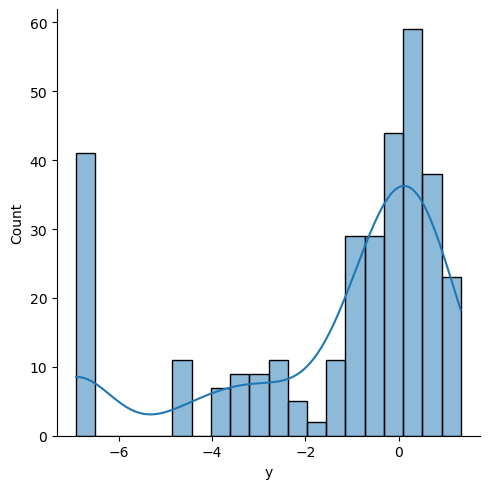

In [33]:
#y
sns.displot(data=df3,x='y',bins=20,kind='hist',kde=True)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


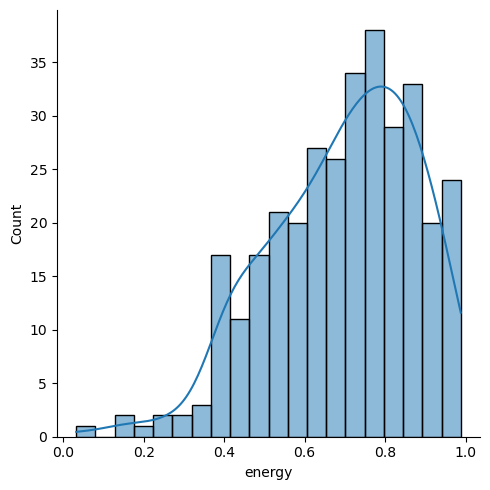

In [34]:
#energy
sns.displot(data=df3, x='energy', bins=20,kind='hist', kde=True)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


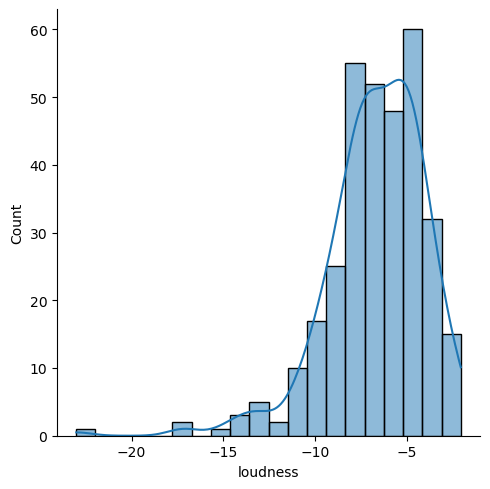

In [35]:
#loudness
sns.displot(data=df3, x='loudness', bins=20,kind='hist', kde=True)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


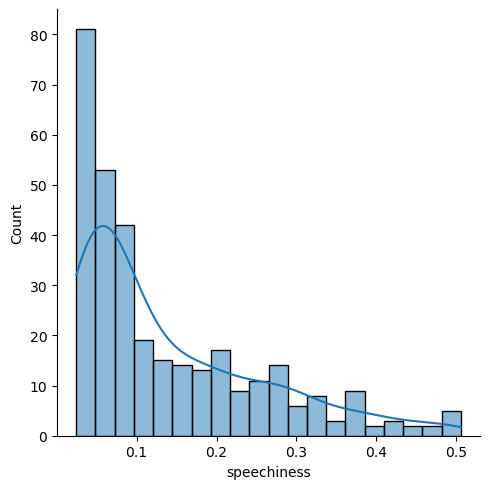

In [36]:
#speechiness
sns.displot(data=df3, x='speechiness', bins=20,kind='hist', kde=True)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


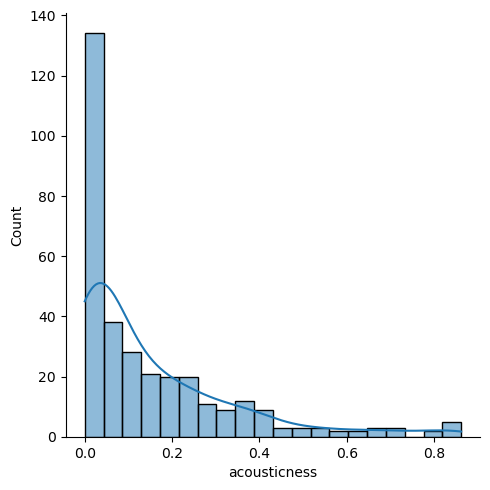

In [37]:
#acousticness
sns.displot(data=df3, x='acousticness', bins=20,kind='hist', kde=True)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


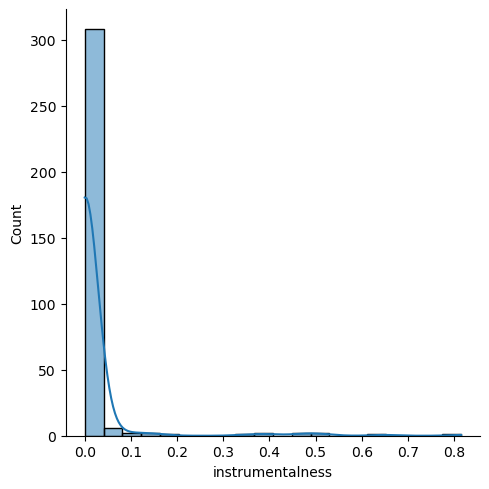

In [38]:
#instrumentalness
sns.displot(data=df3, x='instrumentalness', bins=20,kind='hist', kde=True)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


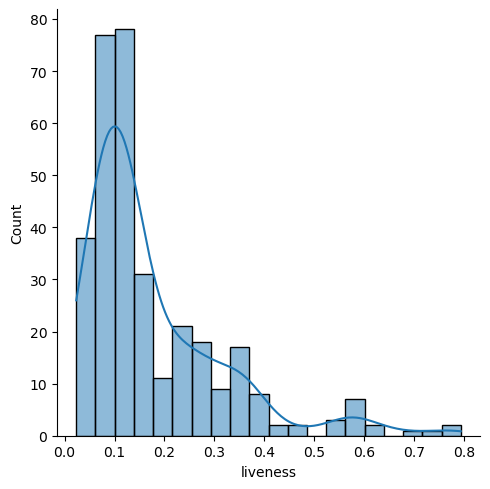

In [39]:
#liveness
sns.displot(data=df3, x='liveness', bins=20,kind='hist', kde=True)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


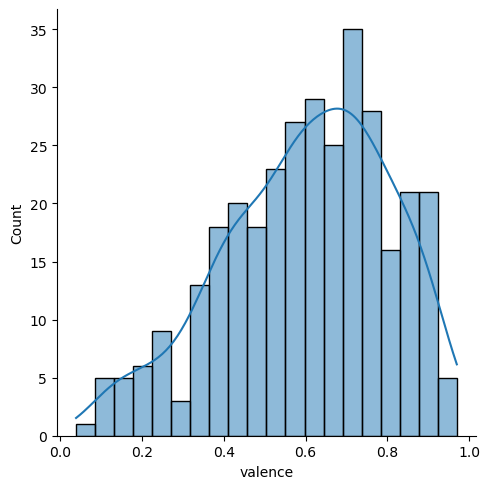

In [40]:
#valence
sns.displot(data=df3, x='valence', bins=20,kind='hist', kde=True)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


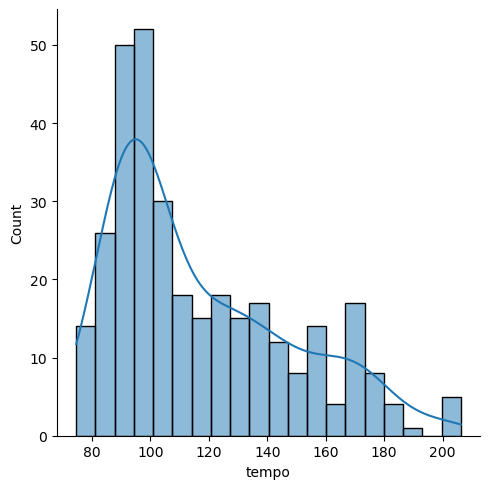

In [41]:
#tempo
sns.displot(data=df3, x='tempo', bins=20,kind='hist', kde=True)
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


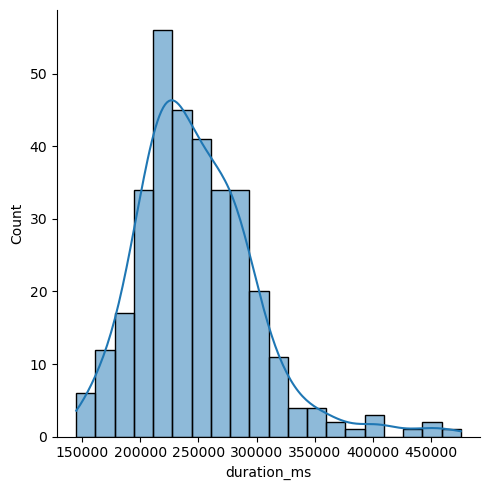

In [42]:
#duration_ms
sns.displot(data=df3, x='duration_ms', bins=20,kind='hist', kde=True)
plt.show()

3.Relationships between continuous variables

In [43]:
df3_viz = df3.drop(columns=['key','mode','release_year','track_pop_shift','track_pop_frac','track_popularity'])

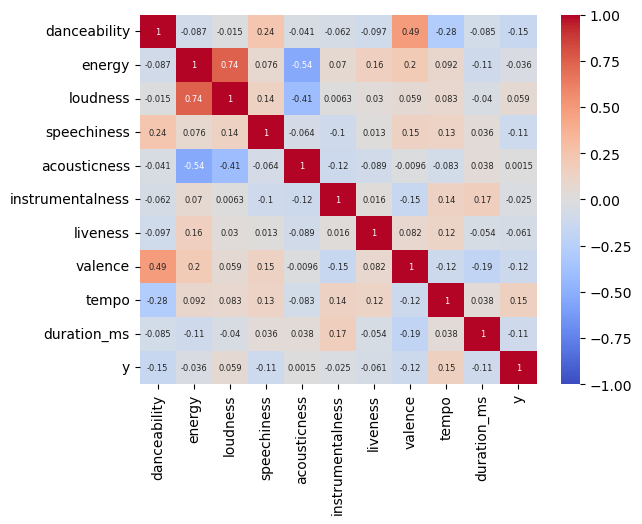

In [44]:
# 1.study relationship between all continuous variables
fig, ax=plt.subplots()

sns.heatmap(data=df3_viz.corr(numeric_only=True),
            vmin=-1,vmax=1,center=0,
            cmap='coolwarm',
            annot=True, annot_kws={'size':6},
            ax=ax)

plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


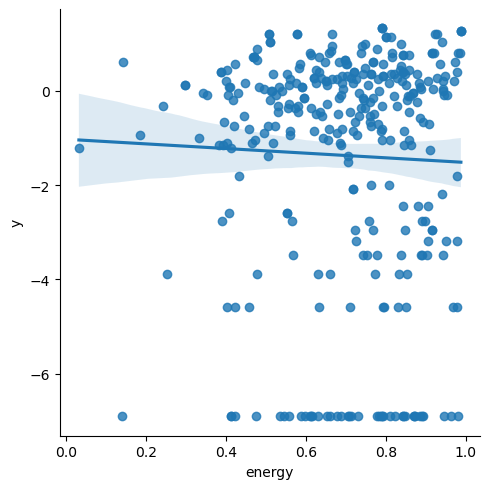

In [45]:
sns.lmplot(data= df3_viz, x='energy', y='y')
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


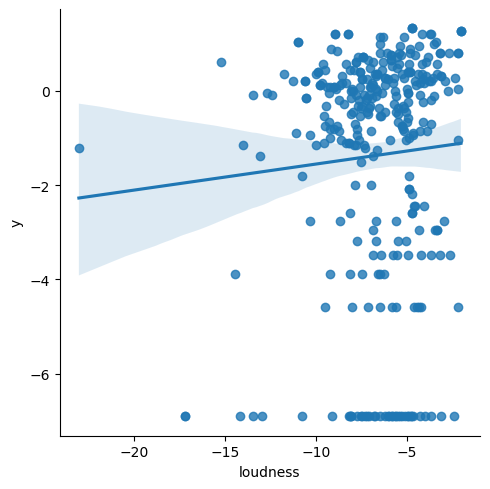

In [46]:
sns.lmplot(data= df3_viz, x='loudness', y='y')
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


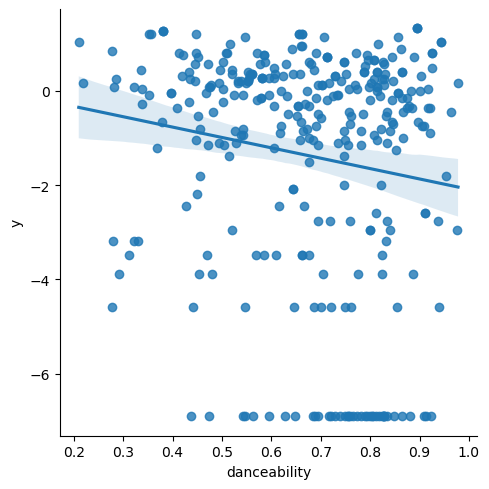

In [47]:
sns.lmplot(data= df3_viz, x='danceability', y='y')
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


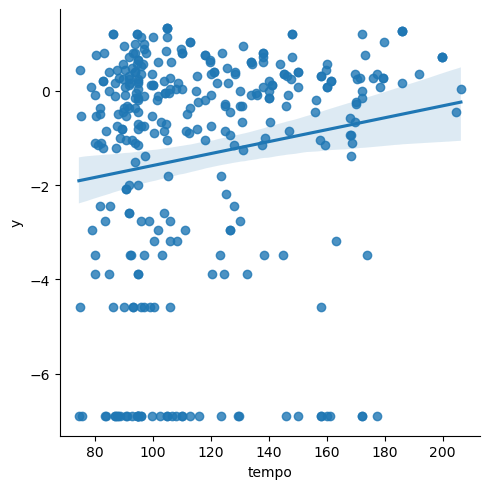

In [48]:
sns.lmplot(data= df3_viz, x='tempo', y='y')
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


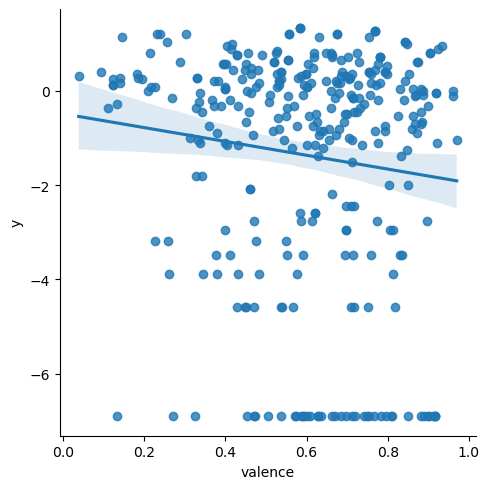

In [49]:
sns.lmplot(data= df3_viz, x='valence', y='y')
plt.show()

4.Summaries of the continuous variables grouped by categorical variables

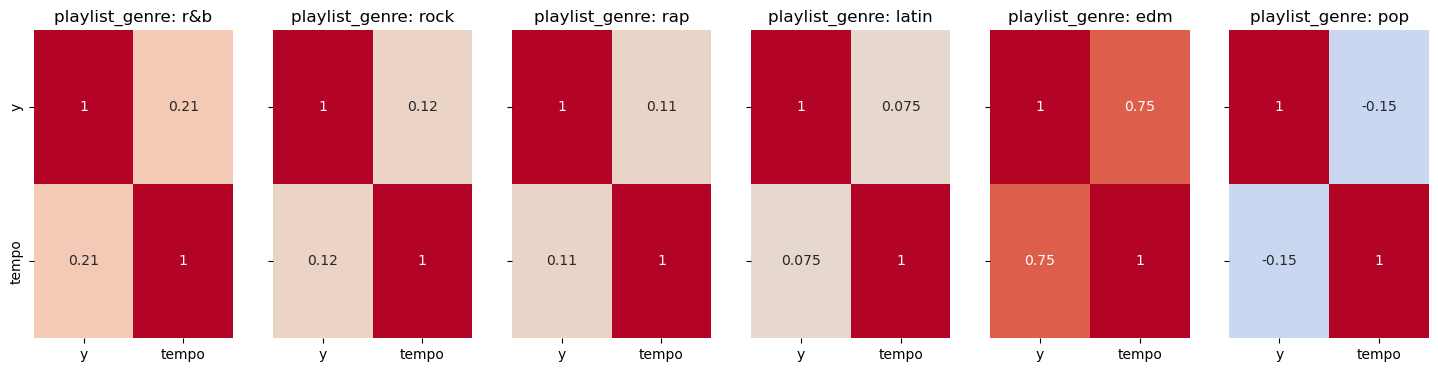

In [50]:
the_groups = df3.playlist_genre.unique()

corr_per_group = df3.loc[:,['y','tempo','playlist_genre']].groupby(['playlist_genre']).corr()

fig, axs=plt.subplots(1,len(the_groups),figsize=(18,4),sharex=True,sharey=True)
for ix in range(len(the_groups)):
    sns.heatmap(data=corr_per_group.loc[the_groups[ix]],
                vmin=-1,vmax=1,center=0,
                cmap='coolwarm',cbar=False,
                annot=True,annot_kws={'size':10},
                ax=axs[ix])
    axs[ix].set_title('playlist_genre: %s' % the_groups[ix])

plt.show()

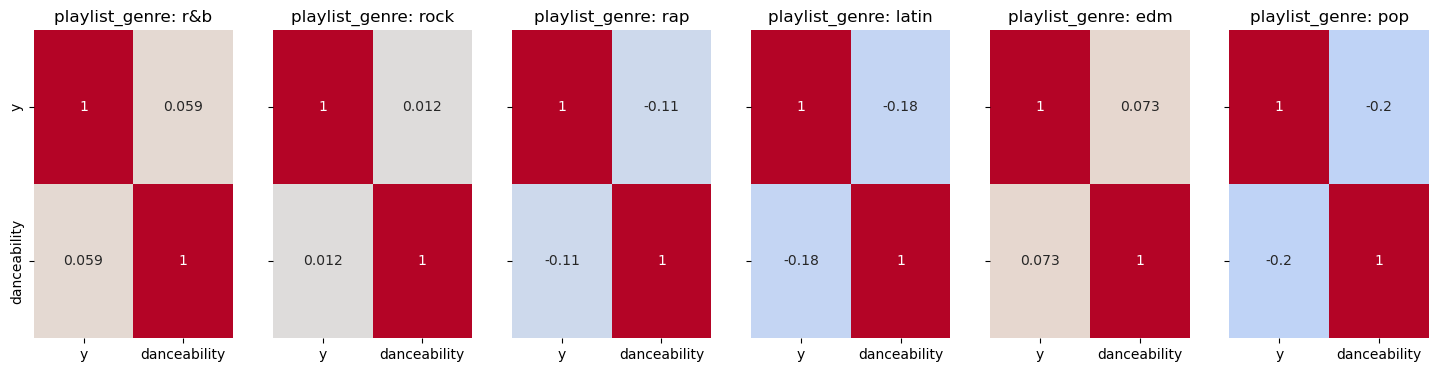

In [51]:
the_groups = df3.playlist_genre.unique()

corr_per_group = df3.loc[:,['y','danceability','playlist_genre']].groupby(['playlist_genre']).corr()

fig, axs=plt.subplots(1,len(the_groups),figsize=(18,4),sharex=True,sharey=True)
for ix in range(len(the_groups)):
    sns.heatmap(data=corr_per_group.loc[the_groups[ix]],
                vmin=-1,vmax=1,center=0,
                cmap='coolwarm',cbar=False,
                annot=True,annot_kws={'size':10},
                ax=axs[ix])
    axs[ix].set_title('playlist_genre: %s' % the_groups[ix])

plt.show()

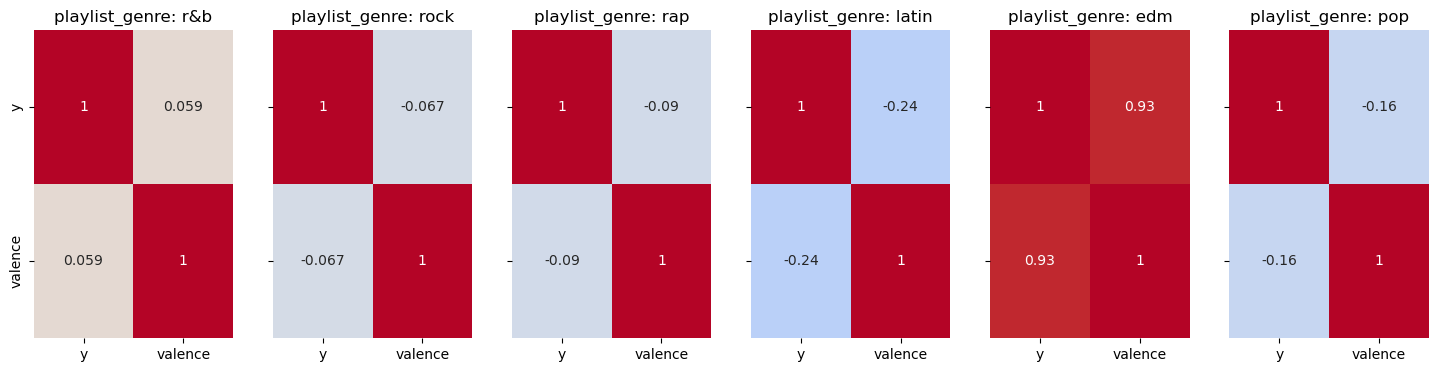

In [52]:
the_groups = df3.playlist_genre.unique()

corr_per_group = df3.loc[:,['y','valence','playlist_genre']].groupby(['playlist_genre']).corr()

fig, axs=plt.subplots(1,len(the_groups),figsize=(18,4),sharex=True,sharey=True)
for ix in range(len(the_groups)):
    sns.heatmap(data=corr_per_group.loc[the_groups[ix]],
                vmin=-1,vmax=1,center=0,
                cmap='coolwarm',cbar=False,
                annot=True,annot_kws={'size':10},
                ax=axs[ix])
    axs[ix].set_title('playlist_genre: %s' % the_groups[ix])

plt.show()

5.Consider visualizing relationships between continuous inputs using scatter plots, pair plots, joint density plots, and correlation plots.

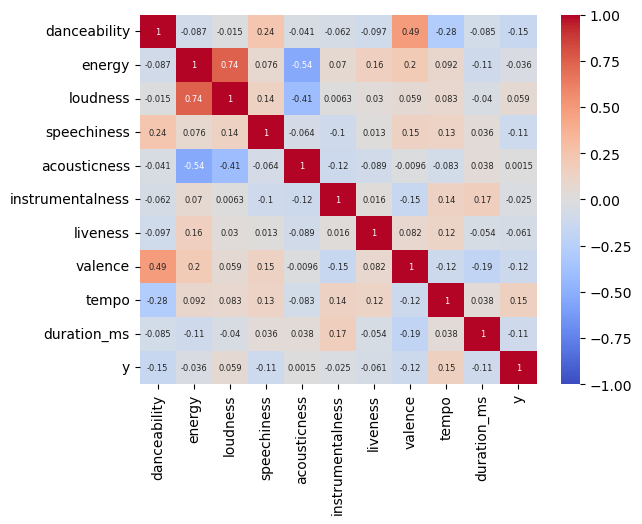

In [53]:
#whole correlation plot
fig, ax=plt.subplots()

sns.heatmap(data=df3_viz.corr(numeric_only=True),
            vmin=-1,vmax=1,center=0,
            cmap='coolwarm',
            annot=True, annot_kws={'size':6},
            ax=ax)

plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


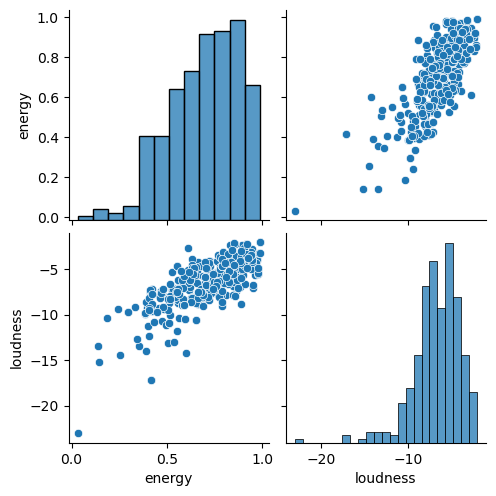

In [54]:
#enery-loudness:pair plot 
sns.pairplot(data=df3_viz.loc[:,['energy','loudness']], diag_kws={'common_norm': False})

plt.show()

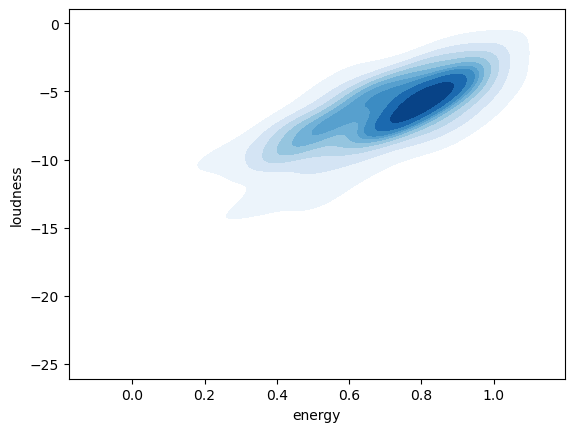

In [55]:
##enery-loudness:joint density plot

sns.kdeplot(data=df3_viz, x='energy', y='loudness', fill=True, cmap='Blues')
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


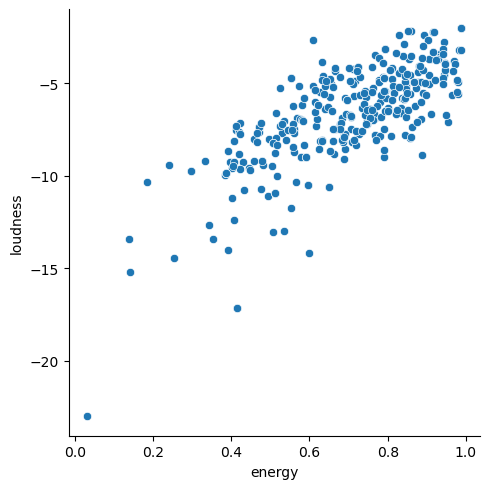

In [56]:
#enery-loudness:scatter plot
sns.relplot(data=df3_viz,x='energy',y='loudness')

plt.show()

Continuous variables `energy` and `loudness` are positively correlated.

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


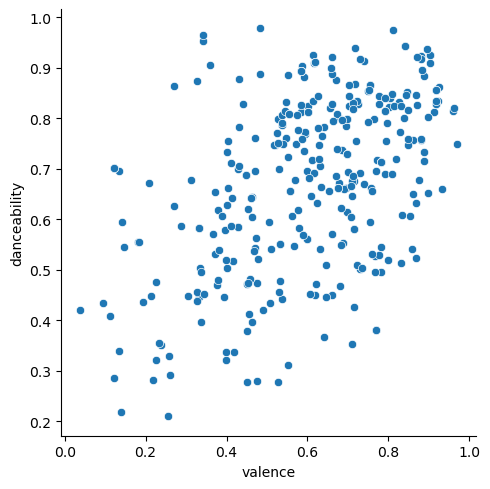

In [57]:
#valence-daceability:scatter plot 0.49
sns.relplot(data=df3_viz,x='valence',y='danceability')

plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


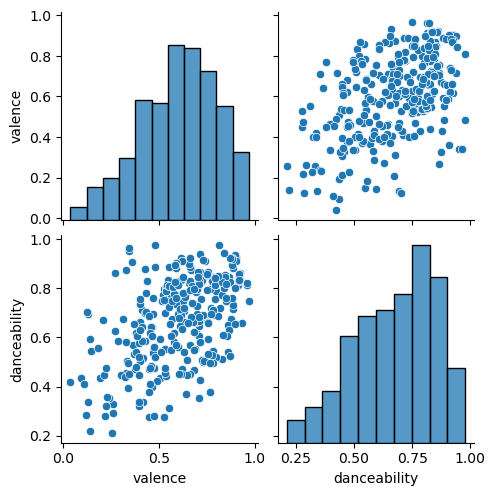

In [58]:
#valence-danceability: pair plot
sns.pairplot(data=df3_viz.loc[:,['valence','danceability']], diag_kws={'common_norm': False})

plt.show()

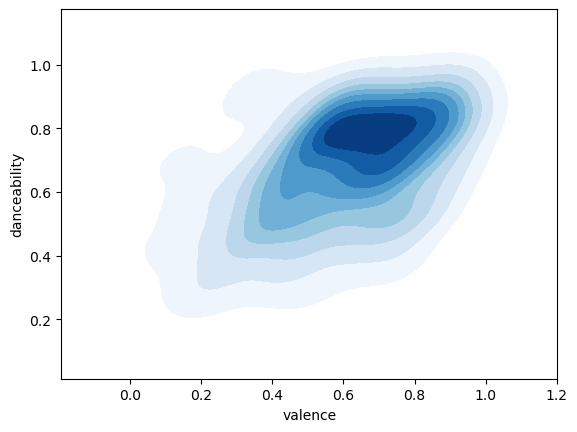

In [59]:
#valence-danceability:joint density plot

sns.kdeplot(data=df3_viz, x='valence', y='danceability', fill=True, cmap='Blues')
plt.show()

Continuous variables `valence` and `danceability` are positively correlated.

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


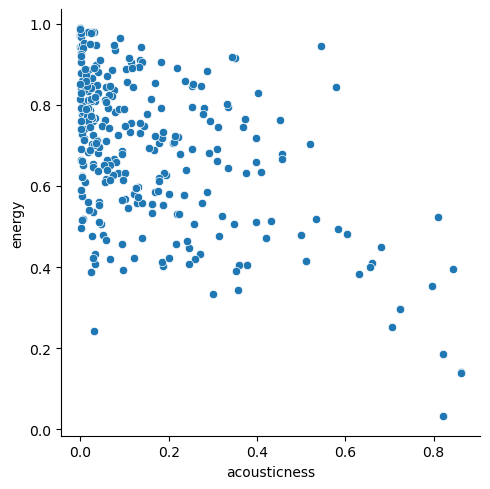

In [60]:
#acousticness-energy: scatter plots -0.54
sns.relplot(data=df3_viz,x='acousticness',y='energy')

plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


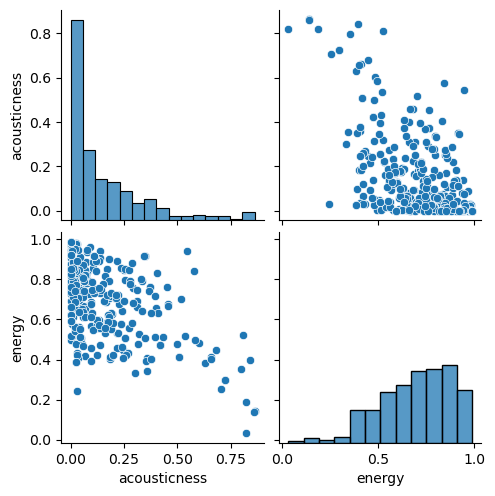

In [61]:
#acousticness-energy: pair plot
sns.pairplot(data=df3_viz.loc[:,['acousticness','energy']], diag_kws={'common_norm': False})

plt.show()

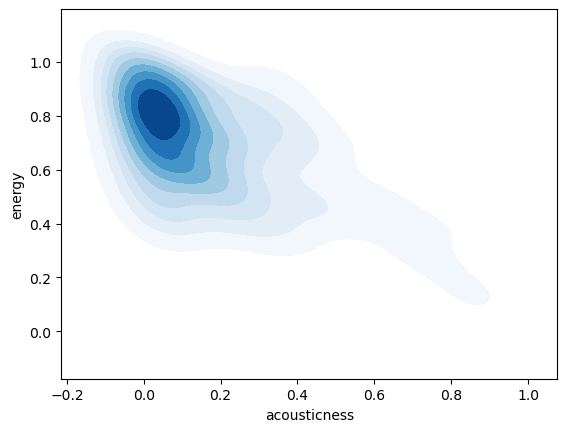

In [62]:
#acousticness-energy:joint density plot

sns.kdeplot(data=df3_viz, x='acousticness', y='energy', fill=True, cmap='Blues')
plt.show()

Continuous variables `acousticness` and `energy` are negatively correlated.

6.If you are working on a regression problem: Visualize scatter plots between the continuous response and the continuous inputs. Summarize the response with boxplots for the unique values of the categorical inputs. Consider using residual plots to assess the fit of your regression model and identify any patterns in residuals.

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


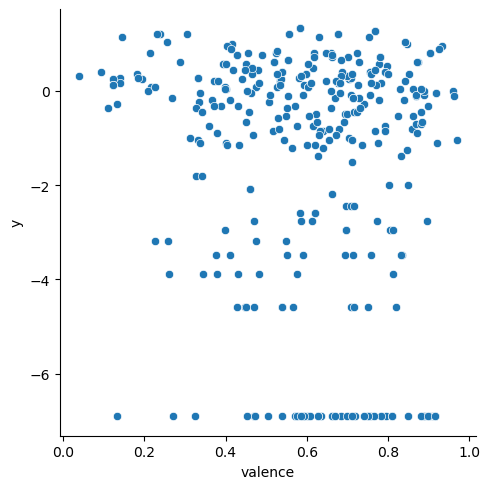

In [63]:
#Visualize scatter plots between the continuous response and the continuous inputs.
sns.relplot(data=df3,x='valence',y='y')

plt.show()

The main popular `valence` was focus on around 0.4 - 1.0.

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


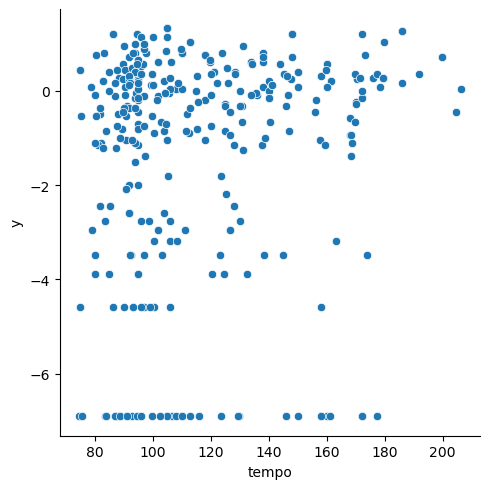

In [64]:
sns.relplot(data=df3,x='tempo',y='y')

plt.show()

The main popular `tempo` was around 80 to 120.

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


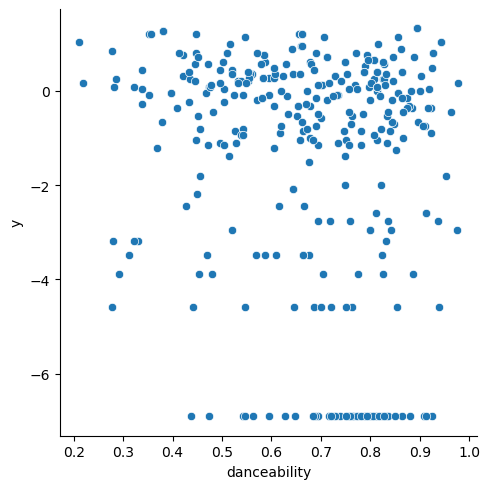

In [65]:
sns.relplot(data=df3,x='danceability',y='y')

plt.show()

Generally, the higher `danceability`, the more popular.

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


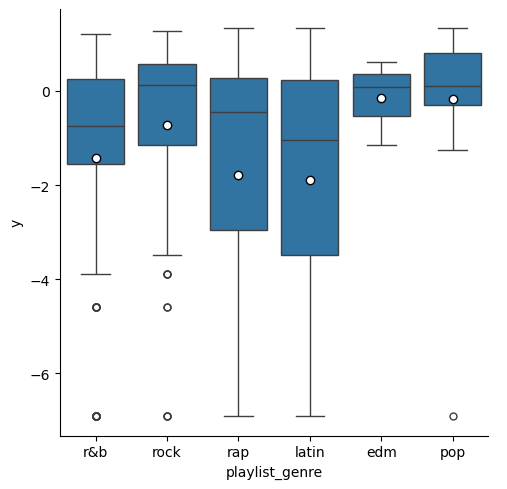

In [66]:
sns.catplot(data=df3, x='playlist_genre', y='y',kind='box',
            showmeans=True,
            meanprops={'marker':'o',
                      'markerfacecolor':'white',
                      'markeredgecolor':'black'})
plt.show()

Different categories of `playlist_genre` cause different popularity.

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


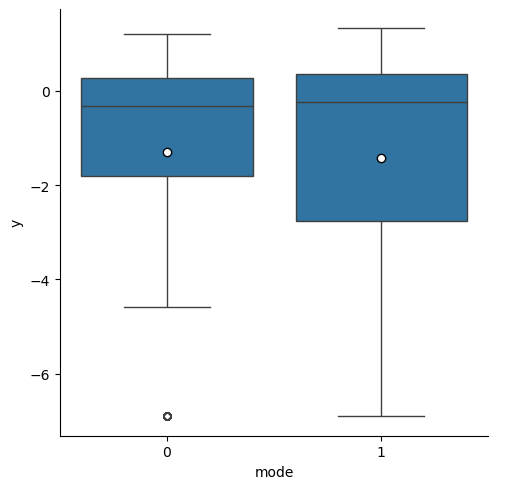

In [67]:
sns.catplot(data=df3, x='mode', y='y',kind='box',
            showmeans=True,
            meanprops={'marker':'o',
                      'markerfacecolor':'white',
                      'markeredgecolor':'black'})
plt.show()

The popularity of the two `mode`s are similar.

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


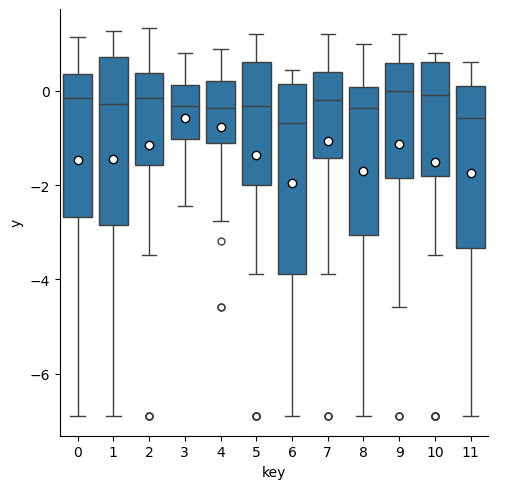

In [68]:
sns.catplot(data=df3, x='key', y='y',kind='box',
            showmeans=True,
            meanprops={'marker':'o',
                      'markerfacecolor':'white',
                      'markeredgecolor':'black'})
plt.show()

Different `key`s have different popularity.

# C. Clustering

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
from sklearn.decomposition import PCA

In [71]:
df3_copy = df3.copy()

In [72]:
df3_copy['key'] = df3.key.astype('object')

In [73]:
df3_copy['mode'] = df3.key.astype('object')

In [74]:
df3_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 148 to 32181
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   track_id                     328 non-null    object        
 1   track_album_id               328 non-null    object        
 2   playlist_id                  328 non-null    object        
 3   track_name                   328 non-null    object        
 4   track_artist                 328 non-null    object        
 5   track_popularity             328 non-null    int64         
 6   track_album_name             328 non-null    object        
 7   track_album_release_date     328 non-null    object        
 8   playlist_name                328 non-null    object        
 9   playlist_genre               328 non-null    object        
 10  playlist_subgenre            328 non-null    object        
 11  danceability                 328 non-null    f

In [75]:
df4 = df3_copy.drop(columns = ['track_pop_shift','track_pop_frac','track_album_release_date_dt','release_year'])

In [76]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 148 to 32181
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  328 non-null    object 
 1   track_album_id            328 non-null    object 
 2   playlist_id               328 non-null    object 
 3   track_name                328 non-null    object 
 4   track_artist              328 non-null    object 
 5   track_popularity          328 non-null    int64  
 6   track_album_name          328 non-null    object 
 7   track_album_release_date  328 non-null    object 
 8   playlist_name             328 non-null    object 
 9   playlist_genre            328 non-null    object 
 10  playlist_subgenre         328 non-null    object 
 11  danceability              328 non-null    float64
 12  energy                    328 non-null    float64
 13  key                       328 non-null    object 
 14  loudness   

In [77]:
df4_features = df4.drop(columns=['y','track_popularity']).select_dtypes('number').copy()

In [78]:
df4_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 148 to 32181
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      328 non-null    float64
 1   energy            328 non-null    float64
 2   loudness          328 non-null    float64
 3   speechiness       328 non-null    float64
 4   acousticness      328 non-null    float64
 5   instrumentalness  328 non-null    float64
 6   liveness          328 non-null    float64
 7   valence           328 non-null    float64
 8   tempo             328 non-null    float64
 9   duration_ms       328 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 36.3 KB


### Judge whether the continuous variables have vastly different scales

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


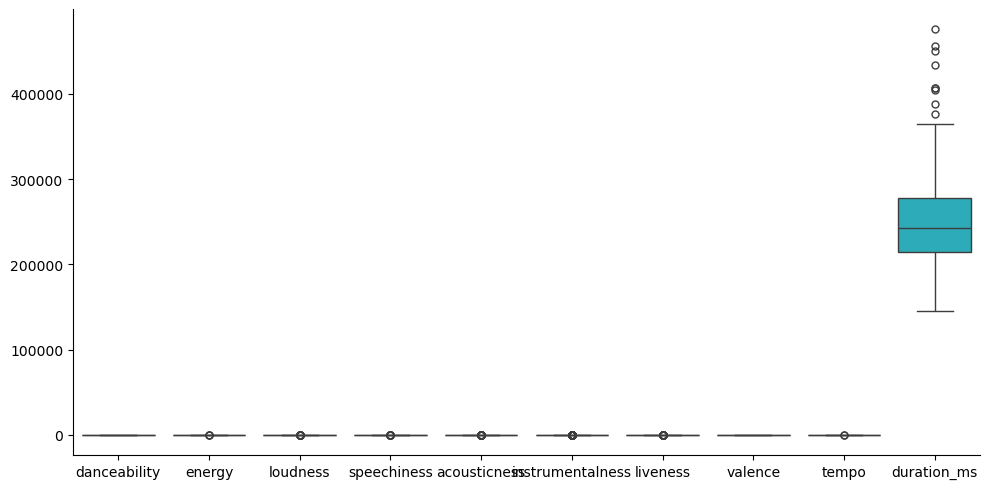

In [79]:
sns.catplot(data=df4_features, kind='box', aspect=2)
plt.show()

The continuous variables have vastly different scales, standardize the variables before clustering is needed.

### Standardize continuous variables

In [80]:
Xdf4 = StandardScaler().fit_transform(df4_features)

In [81]:
xdf4 = pd.DataFrame(Xdf4, columns = df4_features.columns)

In [82]:
xdf4

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.228518,-1.013955,-0.767625,-0.943733,1.303515,-0.210842,2.187045,-0.936229,0.028455,0.059377
1,-0.453146,0.101941,0.358667,-0.675642,-0.611601,-0.210842,-0.679626,-2.274030,-0.933172,1.500060
2,-0.703672,-0.244371,-1.458995,0.768784,-0.788545,0.190331,-0.309733,-0.338908,1.453963,-0.317121
3,-0.703672,-0.244371,-1.458995,0.768784,-0.788545,0.190331,-0.309733,-0.338908,1.453963,-0.317121
4,-0.849326,0.827549,0.563381,1.533530,0.529784,-0.210842,-0.053654,0.821178,0.976431,0.724371
...,...,...,...,...,...,...,...,...,...,...
323,-1.519337,1.234329,0.673867,-0.704857,-0.812472,-0.180955,-0.466227,-0.723958,-0.779263,-0.416850
324,1.114098,0.266852,-0.188220,-0.159224,-0.694844,4.214700,-0.082107,-1.642153,-0.719894,-0.723362
325,-0.820195,0.613165,0.877472,-0.709154,-0.503279,-0.210842,-0.437773,0.776749,-0.974514,-0.612667
326,-2.218480,-0.189401,-0.296489,-0.878429,-0.798043,-0.170035,-0.614895,-1.686582,0.251595,0.692511


i.If you have a mix of continuous and categorical inputs in your data set, cluster the data based on the continuous inputs alone. After identifying the optimal number of clusters, compare the cluster assignments to unique values of several of the categorical inputs.

### Hierarchy cluster

vi.If your EDA revealed that the continuous variables have vastly different scales, you must standardize the variables before clustering. If your EDA revealed that the continuous inputs are highly correlated, consider clustering using the original variables.

The EDA revealed that the continuous inputs (`energy`-`loudness`, `acousticness`-`energy`) are highly correlated, consider clustering using the original variables.

In [90]:
## hierarchy cluster
from scipy.cluster import hierarchy

In [91]:
hclust_ward = hierarchy.ward(Xdf4)

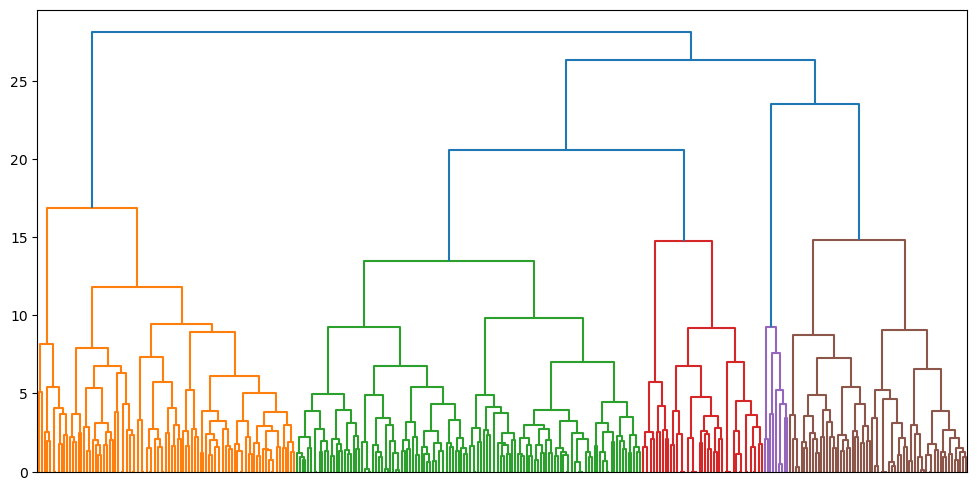

In [92]:
fig = plt.figure(figsize=(12,6))

dn = hierarchy.dendrogram(hclust_ward, no_labels=True)

plt.show()


In [93]:
# n=5
np.unique(hierarchy.cut_tree(hclust_ward, n_clusters = 5).ravel())

array([0, 1, 2, 3, 4])

In [94]:
xdf4['hclust_5'] = pd.Series(hierarchy.cut_tree(hclust_ward, n_clusters=5).ravel(), index=xdf4.index).astype('category')

In [95]:
xdf4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      328 non-null    float64 
 1   energy            328 non-null    float64 
 2   loudness          328 non-null    float64 
 3   speechiness       328 non-null    float64 
 4   acousticness      328 non-null    float64 
 5   instrumentalness  328 non-null    float64 
 6   liveness          328 non-null    float64 
 7   valence           328 non-null    float64 
 8   tempo             328 non-null    float64 
 9   duration_ms       328 non-null    float64 
 10  hclust_5          328 non-null    category
dtypes: category(1), float64(10)
memory usage: 26.2 KB


In [96]:
xdf4.hclust_5

0      0
1      1
2      2
3      2
4      2
      ..
323    1
324    4
325    3
326    1
327    0
Name: hclust_5, Length: 328, dtype: category
Categories (5, int32): [0, 1, 2, 3, 4]

In [97]:
df4_copy = df4.copy()

In [98]:
df4_copy['hclust_5']=  pd.Series(hierarchy.cut_tree(hclust_ward, n_clusters=5).ravel(), index=df4_copy.index).astype('category')

In [99]:
df4_copy.hclust_5.value_counts()

hclust_5
3    122
0     91
1     63
2     43
4      9
Name: count, dtype: int64

### Visualization

i.If you have a mix of continuous and categorical inputs in your data set, cluster the data based on the continuous inputs alone. After identifying the optimal number of clusters, compare the cluster assignments to unique values of several of the categorical inputs.

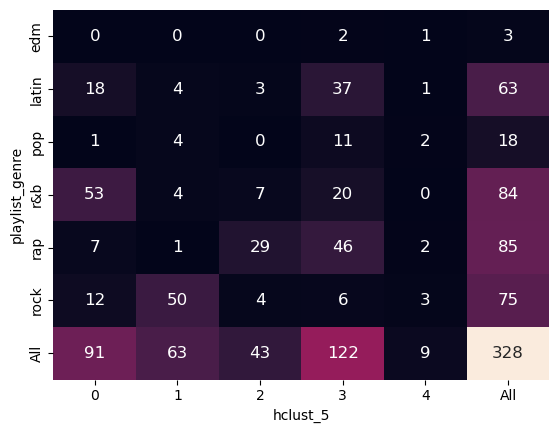

In [100]:
fig, ax=plt.subplots()

sns.heatmap(data=pd.crosstab(df4_copy.playlist_genre, df4_copy.hclust_5,margins=True),
           annot=True, annot_kws={'fontsize':12},fmt='g',
           cbar=False,ax=ax)

plt.show()

ii.Summarize the continuous inputs associated with each of the cluster assignments.

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


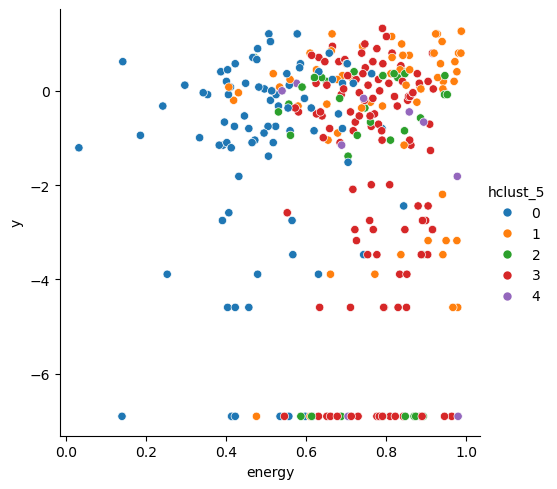

In [101]:
sns.relplot(data=df4_copy,x='energy',y='y',hue='hclust_5')

plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


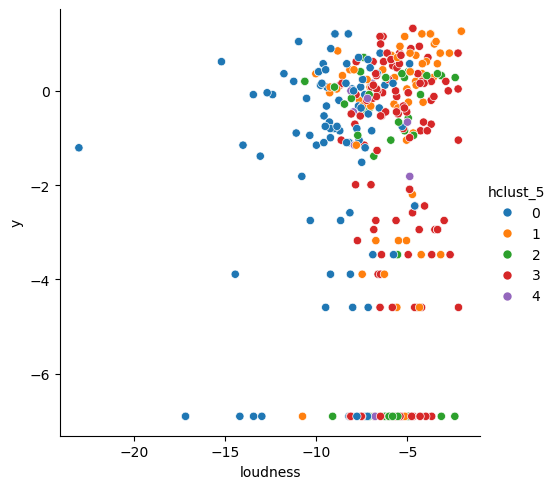

In [102]:
sns.relplot(data=df4_copy,x='loudness',y='y',hue='hclust_5')

plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


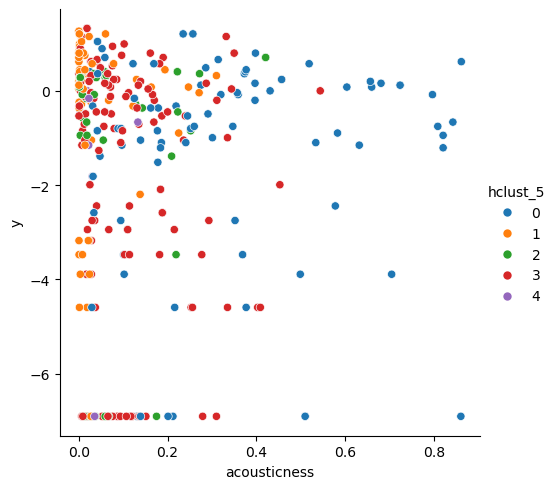

In [103]:

 sns.relplot(data=df4_copy,x='acousticness',y='y',hue='hclust_5')

plt.show()  

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


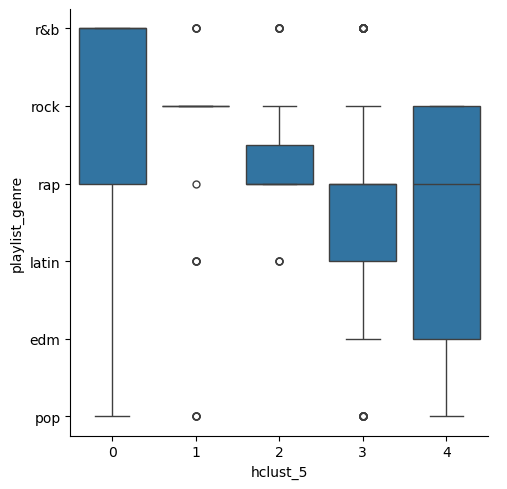

In [104]:
sns.catplot(data=df4_copy, x='hclust_5',y='playlist_genre',kind='box')
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


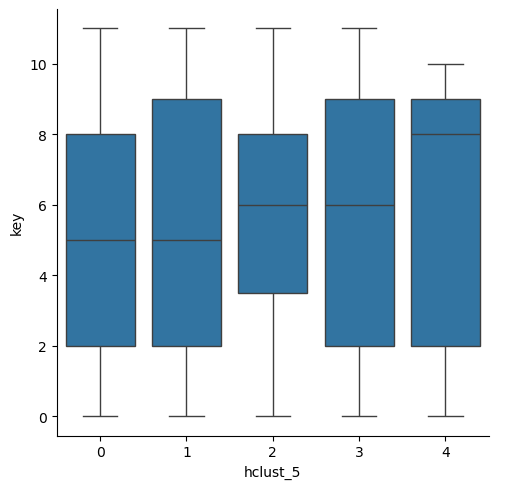

In [105]:
sns.catplot(data=df4_copy, x='hclust_5',y='key',kind='box')
plt.show()

# D.Models: Fitting and Interpretation

## Standardize

In [106]:
df5 = df4.copy().reset_index()

In [107]:

df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     328 non-null    int64  
 1   track_id                  328 non-null    object 
 2   track_album_id            328 non-null    object 
 3   playlist_id               328 non-null    object 
 4   track_name                328 non-null    object 
 5   track_artist              328 non-null    object 
 6   track_popularity          328 non-null    int64  
 7   track_album_name          328 non-null    object 
 8   track_album_release_date  328 non-null    object 
 9   playlist_name             328 non-null    object 
 10  playlist_genre            328 non-null    object 
 11  playlist_subgenre         328 non-null    object 
 12  danceability              328 non-null    float64
 13  energy                    328 non-null    float64
 14  key       

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
df5_co = df5.drop(columns = ['y','track_popularity','index']).select_dtypes('number').copy()

In [110]:
df5_ca = df5.loc[:,['key','mode','playlist_genre']]

In [111]:
df5_y = df5.loc[:,['y']]

In [112]:
df5_co

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.712,0.511,-8.753,0.0297,0.397000,0.00000,0.4830,0.412,117.896,251760
1,0.595,0.714,-5.705,0.0609,0.038100,0.00000,0.0800,0.141,88.449,325333
2,0.552,0.651,-10.624,0.2290,0.004940,0.03490,0.1320,0.533,161.548,232533
3,0.552,0.651,-10.624,0.2290,0.004940,0.03490,0.1320,0.533,161.548,232533
4,0.527,0.846,-5.151,0.3180,0.252000,0.00000,0.1680,0.768,146.925,285720
...,...,...,...,...,...,...,...,...,...,...
323,0.412,0.920,-4.852,0.0575,0.000456,0.00260,0.1100,0.455,93.162,227440
324,0.864,0.744,-7.185,0.1210,0.022500,0.38500,0.1640,0.269,94.980,211787
325,0.532,0.807,-4.301,0.0570,0.058400,0.00000,0.1140,0.759,87.183,217440
326,0.292,0.661,-7.478,0.0373,0.003160,0.00355,0.0891,0.260,124.729,284093


In [113]:
Xdf5_co = StandardScaler().fit_transform(df5_co)

In [114]:
xdf5_co = pd.DataFrame(Xdf5_co,columns=df5_co.columns)

In [115]:
df5_new = pd.concat([xdf5_co, df5_ca, df5_y], ignore_index=False,axis=1)

In [116]:
df5_new

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key,mode,playlist_genre,y
0,0.228518,-1.013955,-0.767625,-0.943733,1.303515,-0.210842,2.187045,-0.936229,0.028455,0.059377,9,9,r&b,-0.200671
1,-0.453146,0.101941,0.358667,-0.675642,-0.611601,-0.210842,-0.679626,-2.274030,-0.933172,1.500060,1,1,rock,0.281851
2,-0.703672,-0.244371,-1.458995,0.768784,-0.788545,0.190331,-0.309733,-0.338908,1.453963,-0.317121,4,4,rock,0.200671
3,-0.703672,-0.244371,-1.458995,0.768784,-0.788545,0.190331,-0.309733,-0.338908,1.453963,-0.317121,4,4,rock,0.200671
4,-0.849326,0.827549,0.563381,1.533530,0.529784,-0.210842,-0.053654,0.821178,0.976431,0.724371,4,4,rap,-0.847298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,-1.519337,1.234329,0.673867,-0.704857,-0.812472,-0.180955,-0.466227,-0.723958,-0.779263,-0.416850,9,9,rock,0.800119
324,1.114098,0.266852,-0.188220,-0.159224,-0.694844,4.214700,-0.082107,-1.642153,-0.719894,-0.723362,2,2,rap,-0.160343
325,-0.820195,0.613165,0.877472,-0.709154,-0.503279,-0.210842,-0.437773,0.776749,-0.974514,-0.612667,2,2,pop,0.160343
326,-2.218480,-0.189401,-0.296489,-0.878429,-0.798043,-0.170035,-0.614895,-1.686582,0.251595,0.692511,11,11,rock,-3.891820


## Fit using statsmodels

In [117]:
import statsmodels.formula.api as smf

In [118]:
df5_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      328 non-null    float64
 1   energy            328 non-null    float64
 2   loudness          328 non-null    float64
 3   speechiness       328 non-null    float64
 4   acousticness      328 non-null    float64
 5   instrumentalness  328 non-null    float64
 6   liveness          328 non-null    float64
 7   valence           328 non-null    float64
 8   tempo             328 non-null    float64
 9   duration_ms       328 non-null    float64
 10  key               328 non-null    object 
 11  mode              328 non-null    object 
 12  playlist_genre    328 non-null    object 
 13  y                 328 non-null    float64
dtypes: float64(11), object(3)
memory usage: 36.0+ KB


In [119]:
df5_new.rename(columns={'key': 'xa1', 'mode': 'xa2', 'playlist_genre': 'xa3'}, inplace=True)

In [120]:
df5_new.rename(columns={'danceability': 'xo1', 'energy': 'xo2', 'loudness': 'xo3', 'speechiness':'xo4','acousticness':'xo5','instrumentalness':'xo6','liveness':'xo7','valence':'xo8','tempo':'xo9','duration_ms':'xo10'}, inplace=True)

In [121]:
df5_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   xo1     328 non-null    float64
 1   xo2     328 non-null    float64
 2   xo3     328 non-null    float64
 3   xo4     328 non-null    float64
 4   xo5     328 non-null    float64
 5   xo6     328 non-null    float64
 6   xo7     328 non-null    float64
 7   xo8     328 non-null    float64
 8   xo9     328 non-null    float64
 9   xo10    328 non-null    float64
 10  xa1     328 non-null    object 
 11  xa2     328 non-null    object 
 12  xa3     328 non-null    object 
 13  y       328 non-null    float64
dtypes: float64(11), object(3)
memory usage: 36.0+ KB


multiple models:

6 must consider;
2 additional with all variables.


In [122]:
formula_list =  ['y ~ 1',
              'y ~ xa1 + xa2 + xa3',
              'y ~ xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + xo8 + xo9 + xo10',
              'y ~ xa1 + xa2 + xa3 + xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + xo8 + xo9 + xo10',
              'y ~ (xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + xo8 + xo9 + xo10)** 2',
              'y ~ (xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + xo8 + xo9 + xo10) * (xa1 + xa2 + xa3) ',
              'y ~ (xa1 + xa2 + xa3) + (xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + xo8 + xo9 + xo10 + np.power(xo1,2) +  np.power(xo2,2) + np.power(xo3,2) + np.power(xo4,2) + np.power(xo5,2) + np.power(xo6,2) + np.power(xo7,2) + np.power(xo8,2) + np.power(xo9,2) + np.power(xo10,2))',
              'y ~ (xa1 + xa2 + xa3) * (xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + xo8 + xo9 + xo10 + np.power(xo1,2) +  np.power(xo2,2) + np.power(xo3,2) + np.power(xo4,2) + np.power(xo5,2) + np.power(xo6,2) + np.power(xo7,2) + np.power(xo8,2) + np.power(xo9,2) + np.power(xo10,2))']

In [123]:
formula_list[7]

'y ~ (xa1 + xa2 + xa3) * (xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + xo8 + xo9 + xo10 + np.power(xo1,2) +  np.power(xo2,2) + np.power(xo3,2) + np.power(xo4,2) + np.power(xo5,2) + np.power(xo6,2) + np.power(xo7,2) + np.power(xo8,2) + np.power(xo9,2) + np.power(xo10,2))'

**For each model that you fit you must answer the following questions associated with the regression coefficients:**

i.How many coefficients were estimated?

ii.How many coefficients (and thus features) are STATISTICALLY SIGNIFICANT using commonly accepted thresholds?

iii.WHICH coefficients (and thus features) are STATISTICALLY SIGNIFICANT and what are the coefficients POSITIVE or NEGATIVE for those features?

iv.Which two STATISTICALLY SIGNIFICANT coefficients (and thus features) have the highest MAGNITUDE coefficient values?

In [124]:
fit_00 = smf.ols(formula=formula_list[0], data=df5_new).fit()

In [125]:
fit_00.params

Intercept   -1.369664
dtype: float64

In [126]:
fit_00.bse

Intercept    0.13931
dtype: float64

In [127]:
fit_00.pvalues < 0.05

Intercept    True
dtype: bool

In [128]:
print(fit_00.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 12 Dec 2024   Prob (F-statistic):                nan
Time:                        20:30:45   Log-Likelihood:                -768.46
No. Observations:                 328   AIC:                             1539.
Df Residuals:                     327   BIC:                             1543.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3697      0.139     -9.832      0.0

**fit_00**: 

i:only intercept was estimated.

ii:1, the intercept.

iii:intercept(negative).

iv: not available.

In [129]:
fit_01 = smf.ols(formula=formula_list[1], data=df5_new).fit()

In [130]:
print(fit_01.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.315
Date:                Thu, 12 Dec 2024   Prob (F-statistic):              0.186
Time:                        20:30:49   Log-Likelihood:                -757.73
No. Observations:                 328   AIC:                             1549.
Df Residuals:                     311   BIC:                             1614.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3099      1.553     -0.200   

In [131]:
len(fit_01.params)

28

In [132]:
fit_01.pvalues < 0.05 

Intercept       False
xa1[T.1]        False
xa1[T.2]        False
xa1[T.3]        False
xa1[T.4]        False
xa1[T.5]        False
xa1[T.6]        False
xa1[T.7]        False
xa1[T.8]        False
xa1[T.9]        False
xa1[T.10]       False
xa1[T.11]       False
xa2[T.1]        False
xa2[T.2]        False
xa2[T.3]        False
xa2[T.4]        False
xa2[T.5]        False
xa2[T.6]        False
xa2[T.7]        False
xa2[T.8]        False
xa2[T.9]        False
xa2[T.10]       False
xa2[T.11]       False
xa3[T.latin]    False
xa3[T.pop]      False
xa3[T.r&b]      False
xa3[T.rap]      False
xa3[T.rock]     False
dtype: bool

**fit_01:** 

i: 28.

ii:none.

iii:none.

iv:not avaiable(NA).

In [133]:
fit_02 = smf.ols(formula=formula_list[2], data=df5_new).fit()

In [134]:
print(fit_02.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     3.355
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           0.000359
Time:                        20:30:52   Log-Likelihood:                -751.96
No. Observations:                 328   AIC:                             1526.
Df Residuals:                     317   BIC:                             1568.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3697      0.135    -10.180      0.0

In [135]:
len(fit_02.params)

11

In [136]:
fit_02.params

Intercept   -1.369664
xo1         -0.254649
xo2         -0.552810
xo3          0.527836
xo4         -0.294229
xo5         -0.086426
xo6         -0.090922
xo7         -0.168461
xo8         -0.073912
xo9          0.392640
xo10        -0.343292
dtype: float64

In [137]:
fit_02.pvalues < 0.05

Intercept     True
xo1          False
xo2           True
xo3           True
xo4           True
xo5          False
xo6          False
xo7          False
xo8          False
xo9           True
xo10          True
dtype: bool

**fit_02:**

i:11.

ii:6 coefficients:intercept, xo2, xo3, xo4, xo9, xo10.

iii:as follows:

Intercept:-1.369664(negative).

xo2:-0.552810(negative).

xo3:0.527836(positive).

xo4:-0.294229(negative).

xo9:0.392640(positive).

xo10:-0.343292(negative).

iv:intercept and xo2.

In [138]:
fit_03 = smf.ols(formula=formula_list[3], data=df5_new).fit()

In [139]:
fit_03.params

Intercept       0.307332
xa1[T.1]        0.006082
xa1[T.2]        0.104477
xa1[T.3]        0.323718
xa1[T.4]        0.186294
xa1[T.5]        0.078887
xa1[T.6]       -0.013384
xa1[T.7]        0.438080
xa1[T.8]       -0.072181
xa1[T.9]        0.084579
xa1[T.10]      -0.123314
xa1[T.11]      -0.123451
xa2[T.1]        0.006082
xa2[T.2]        0.104477
xa2[T.3]        0.323718
xa2[T.4]        0.186294
xa2[T.5]        0.078887
xa2[T.6]       -0.013384
xa2[T.7]        0.438080
xa2[T.8]       -0.072181
xa2[T.9]        0.084579
xa2[T.10]      -0.123314
xa2[T.11]      -0.123451
xa3[T.latin]   -2.176195
xa3[T.pop]     -0.492876
xa3[T.r&b]     -2.009369
xa3[T.rap]     -2.174006
xa3[T.rock]    -1.199117
xo1            -0.115966
xo2            -0.696567
xo3             0.636179
xo4            -0.098570
xo5            -0.004158
xo6            -0.105540
xo7            -0.146511
xo8            -0.037778
xo9             0.325810
xo10           -0.380575
dtype: float64

In [140]:
len(fit_03.params)

38

In [141]:
fit_03.pvalues < 0.05

Intercept       False
xa1[T.1]        False
xa1[T.2]        False
xa1[T.3]        False
xa1[T.4]        False
xa1[T.5]        False
xa1[T.6]        False
xa1[T.7]        False
xa1[T.8]        False
xa1[T.9]        False
xa1[T.10]       False
xa1[T.11]       False
xa2[T.1]        False
xa2[T.2]        False
xa2[T.3]        False
xa2[T.4]        False
xa2[T.5]        False
xa2[T.6]        False
xa2[T.7]        False
xa2[T.8]        False
xa2[T.9]        False
xa2[T.10]       False
xa2[T.11]       False
xa3[T.latin]    False
xa3[T.pop]      False
xa3[T.r&b]      False
xa3[T.rap]      False
xa3[T.rock]     False
xo1             False
xo2              True
xo3              True
xo4             False
xo5             False
xo6             False
xo7             False
xo8             False
xo9              True
xo10             True
dtype: bool

**fit_03**:

i:38.

ii:4. xo2, xo3, xo9, xo10.

iii: as follows:

xo2:-0.696567(negative),

xo3:0.636179(positive),

xo9:0.325810(positive),

xo10:-0.380575(negative).

iv:xo2 and xo3.

In [142]:
fit_04 = smf.ols(formula=formula_list[4], data=df5_new).fit()

In [143]:
print(fit_04.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     1.366
Date:                Thu, 12 Dec 2024   Prob (F-statistic):             0.0562
Time:                        20:30:59   Log-Likelihood:                -728.45
No. Observations:                 328   AIC:                             1569.
Df Residuals:                     272   BIC:                             1781.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1970      0.275     -4.358      0.0

In [144]:
len(fit_04.params)

56

In [145]:
fit_04.params

Intercept   -1.197021
xo1         -0.204179
xo2         -0.492885
xo3          0.486855
xo4          0.029285
xo5         -0.050610
xo6          0.173452
xo7         -0.239649
xo8         -0.207340
xo9          0.290324
xo10        -0.268953
xo1:xo2      0.453979
xo1:xo3     -0.078793
xo1:xo4     -0.001225
xo1:xo5     -0.061348
xo1:xo6     -0.226485
xo1:xo7     -0.128195
xo1:xo8     -0.192824
xo1:xo9      0.159948
xo1:xo10     0.273344
xo2:xo3      0.222802
xo2:xo4     -0.567616
xo2:xo5      0.209396
xo2:xo6     -0.246665
xo2:xo7      0.043743
xo2:xo8     -0.646115
xo2:xo9      0.344194
xo2:xo10     0.492238
xo3:xo4      0.004065
xo3:xo5      0.096674
xo3:xo6     -0.349785
xo3:xo7      0.009137
xo3:xo8      0.256604
xo3:xo9     -0.165343
xo3:xo10    -0.377246
xo4:xo5      0.113076
xo4:xo6      1.860426
xo4:xo7      0.013426
xo4:xo8      0.366802
xo4:xo9      0.180124
xo4:xo10     0.162056
xo5:xo6     -1.689833
xo5:xo7      0.199484
xo5:xo8     -0.236321
xo5:xo9     -0.064562
xo5:xo10  

In [146]:
fit_04.pvalues < 0.05

Intercept     True
xo1          False
xo2          False
xo3          False
xo4          False
xo5          False
xo6          False
xo7          False
xo8          False
xo9          False
xo10         False
xo1:xo2      False
xo1:xo3      False
xo1:xo4      False
xo1:xo5      False
xo1:xo6      False
xo1:xo7      False
xo1:xo8      False
xo1:xo9      False
xo1:xo10     False
xo2:xo3      False
xo2:xo4      False
xo2:xo5      False
xo2:xo6      False
xo2:xo7      False
xo2:xo8       True
xo2:xo9      False
xo2:xo10     False
xo3:xo4      False
xo3:xo5      False
xo3:xo6      False
xo3:xo7      False
xo3:xo8      False
xo3:xo9      False
xo3:xo10     False
xo4:xo5      False
xo4:xo6      False
xo4:xo7      False
xo4:xo8      False
xo4:xo9      False
xo4:xo10     False
xo5:xo6      False
xo5:xo7      False
xo5:xo8      False
xo5:xo9      False
xo5:xo10     False
xo6:xo7      False
xo6:xo8      False
xo6:xo9      False
xo6:xo10     False
xo7:xo8      False
xo7:xo9      False
xo7:xo10    

**fit_04**:

i:56.

ii: 3. intercept, xo2:xo8, xo7:xo10.

iii: as follows:

intercept:-1.197021(negative), 

xo2:xo8 -0.646115(negative), 

xo7:xo10 0.407678 (negative).

iv: intercept and xo2:xo8.

In [147]:
fit_05 = smf.ols(formula=formula_list[5], data=df5_new).fit()

In [148]:
print(fit_05.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.003
Date:                Thu, 12 Dec 2024   Prob (F-statistic):              0.494
Time:                        20:31:03   Log-Likelihood:                -641.49
No. Observations:                 328   AIC:                             1637.
Df Residuals:                     151   BIC:                             2308.
Df Model:                         176                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1496      1.42

In [149]:
fit_05.params

Intercept            1.149640
xa1[T.1]            -1.668951
xa1[T.2]            -0.559869
xa1[T.3]            -0.003865
xa1[T.4]             0.874659
                       ...   
xo10:xa3[T.latin]   -0.530830
xo10:xa3[T.pop]     -0.384192
xo10:xa3[T.r&b]     -0.479647
xo10:xa3[T.rap]      0.561590
xo10:xa3[T.rock]    -0.987449
Length: 308, dtype: float64

In [150]:
len(fit_05.params)

308

In [151]:
fit_05.pvalues < 0.05

Intercept            False
xa1[T.1]             False
xa1[T.2]             False
xa1[T.3]             False
xa1[T.4]             False
                     ...  
xo10:xa3[T.latin]    False
xo10:xa3[T.pop]      False
xo10:xa3[T.r&b]      False
xo10:xa3[T.rap]      False
xo10:xa3[T.rock]     False
Length: 308, dtype: bool

**fit_05**:

i: 308.

ii: 18.  
xa3[T.r&b], 
xo2:xa1[T.1], 
xo2:xa1[T.10],
xo2:xa2[T.1],
xo2:xa2[T.10],
xo5:xa3[T.rap],
xo5:xa3[T.rock],
xo7:xa1[T.1],
xo7:xa1[T.4],
xo7:xa1[T.9],
xo7:xa1[T.11],
xo7:xa2[T.1],
xo7:xa2[T.4],
xo7:xa2[T.5],
xo7:xa2[T.9],
xo7:xa2[T.11],
xo8:xa1[T.5],
xo8:xa2[T.5].

iii: 

xa3[T.r&b],-4.5357 (negative)
xo2:xa1[T.1], 2.021 (positive)
3
xo2:xa1[T.10],3.44 (positive)
05
xo2:xa2[T.1],2.0 (positive)
213
xo2:xa2[T.10],3. (positive)
4405
xo5:xa3[T.rap],1 (positive)
.9848
xo5:xa3[T.rock], (positive)
2.3109
xo7:xa1[T.1], (negative)
-1.2628
xo7:xa1[T.4],(negative)
-1.4651 
xo7:xa1[T.9 (negative)
],-1.2089
xo7:xa1[T.1 (negative)1
],-1.6892 
xo7:xa2[T.(negative)
1],-1.2628 
xo7:xa2[T(negative)
.4],-1.4651 
xo7:xa2[T(negative)
.5], -1.6588 
xo7:xa2[(negative)
T.9], -1.2089 
xo7:xa2 (negative)
[T.11], -1.6892
xo8:(positive)
xa1[T.5],1.4097 
xo8 (positive):xa2[Txa3[T.r&b], xo2:xa2[T.10]cept and xo2:xo8.

In [152]:
fit_06 = smf.ols(formula=formula_list[6], data=df5_new).fit()

In [153]:
print(fit_06.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.429
Date:                Thu, 12 Dec 2024   Prob (F-statistic):             0.0598
Time:                        20:31:07   Log-Likelihood:                -741.77
No. Observations:                 328   AIC:                             1558.
Df Residuals:                     291   BIC:                             1698.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4328      1.61

In [154]:
fit_06.params

Intercept            0.432819
xa1[T.1]             0.024142
xa1[T.2]             0.100098
xa1[T.3]             0.487453
xa1[T.4]             0.149793
xa1[T.5]             0.024035
xa1[T.6]             0.030522
xa1[T.7]             0.451839
xa1[T.8]            -0.074178
xa1[T.9]             0.076478
xa1[T.10]           -0.083696
xa1[T.11]           -0.147333
xa2[T.1]             0.024142
xa2[T.2]             0.100098
xa2[T.3]             0.487453
xa2[T.4]             0.149793
xa2[T.5]             0.024035
xa2[T.6]             0.030522
xa2[T.7]             0.451839
xa2[T.8]            -0.074178
xa2[T.9]             0.076478
xa2[T.10]           -0.083696
xa2[T.11]           -0.147333
xa3[T.latin]        -2.360171
xa3[T.pop]          -0.435641
xa3[T.r&b]          -1.965420
xa3[T.rap]          -2.207750
xa3[T.rock]         -1.236741
xo1                 -0.112018
xo2                 -0.634028
xo3                  0.414208
xo4                 -0.084765
xo5                  0.074885
xo6       

In [155]:
len(fit_06.params)

48

In [156]:
fit_06.pvalues < 0.05

Intercept            False
xa1[T.1]             False
xa1[T.2]             False
xa1[T.3]             False
xa1[T.4]             False
xa1[T.5]             False
xa1[T.6]             False
xa1[T.7]             False
xa1[T.8]             False
xa1[T.9]             False
xa1[T.10]            False
xa1[T.11]            False
xa2[T.1]             False
xa2[T.2]             False
xa2[T.3]             False
xa2[T.4]             False
xa2[T.5]             False
xa2[T.6]             False
xa2[T.7]             False
xa2[T.8]             False
xa2[T.9]             False
xa2[T.10]            False
xa2[T.11]            False
xa3[T.latin]         False
xa3[T.pop]           False
xa3[T.r&b]           False
xa3[T.rap]           False
xa3[T.rock]          False
xo1                  False
xo2                   True
xo3                  False
xo4                  False
xo5                  False
xo6                  False
xo7                  False
xo8                  False
xo9                  False
x

**fit_06**:

i:48.

ii: 2. xo2, xo10.

iii: 

xo2 -0.634028(negative) 

xo10 -0.443323 (negative).

iv: xo2, xo10.

In [157]:
fit_07 = smf.ols(formula=formula_list[7], data=df5_new).fit()

In [158]:
print(fit_07.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     1.648
Date:                Thu, 12 Dec 2024   Prob (F-statistic):             0.0868
Time:                        20:31:12   Log-Likelihood:                -240.45
No. Observations:                 328   AIC:                             1095.
Df Residuals:                      21   BIC:                             2259.
Df Model:                         306                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [159]:
len(fit_07.params)

588

In [160]:
fit_07.pvalues < 0.05

Intercept                         False
xa1[T.1]                          False
xa1[T.2]                          False
xa1[T.3]                           True
xa1[T.4]                          False
                                  ...  
xa3[T.latin]:np.power(xo10, 2)    False
xa3[T.pop]:np.power(xo10, 2)      False
xa3[T.r&b]:np.power(xo10, 2)      False
xa3[T.rap]:np.power(xo10, 2)      False
xa3[T.rock]:np.power(xo10, 2)      True
Length: 588, dtype: bool

**fit_07**:

i: 588.

ii: 126.

iii: 

xa1[T.3]	25.4538	(positive)
xa1[T.10]	70.0216	(positive)
xa2[T.3]	25.4538	(positive)
xa2[T.10]	70.0216	(positive)
xa1[T.3]:xo1	-11.8855	(negative)
xa1[T.8]:xo1	22.094	(positive)
xa2[T.3]:xo1	-11.8855	(negative)
xa2[T.8]:xo1	22.094	(positive)
xa3[T.rock]:xo1	-34.6541	(negative)
xa1[T.11]:xo2	-36.4555	(negative)
xa2[T.11]:xo2	-36.4555	(negative)
xa3[T.latin]:xo2	50.8644	(positive)
xa3[T.rap]:xo2	21.6763	(positive)
xa1[T.10]:xo3	-60.5616	(negative)
xa2[T.10]:xo3	-60.5616	(negative)
xo4	120.0631	(positive)
xa1[T.2]:xo4	-76.2567	(negative)
xa1[T.3]:xo4	-40.8341	(negative)
xa1[T.4]:xo4	-71.689	(negative)
xa1[T.6]:xo4	-70.8929	(negative)
xa1[T.7]:xo4	-70.2491	(negative)
xa1[T.9]:xo4	-125.5201	(negative)
xa1[T.11]:xo4	-73.4482	(negative)
xa2[T.2]:xo4	-76.2567	(negative)
xa2[T.3]:xo4	-40.8341	(negative)
xa2[T.4]:xo4	-71.689	(negative)
xa2[T.6]:xo4	-70.8929	(negative)
xa2[T.7]:xo4	-70.2491	(negative)
xa2[T.9]:xo4	-125.5201	(negative)
xa2[T.11]:xo4	-73.4482	(negative)
xa3[T.r&b]:xo4	15.6392	(positive)
xa3[T.rock]:xo4	94.6516	(positive)
xa1[T.3]:xo5	-22.0823	(negative)
xa1[T.9]:xo5	37.4434	(positive)
xa2[T.3]:xo5	-22.0823	(negative)
xa2[T.9]:xo5	37.4434	(positive)
xa1[T.2]:xo6	-97.0194	(negative)
xa1[T.3]:xo6	-5.3659	(negative)
xa2[T.2]:xo6	-97.0194	(negative)
xa2[T.3]:xo6	-5.3659	(negative)
xa3[T.latin]:xo6	-95.6508	(negative)
xa3[T.r&b]:xo6	328.9448	(positive)
xo7	-63.5582	(negative)
xa1[T.1]:xo7	35.5831	(positive)
xa1[T.4]:xo7	33.7546	(positive)
xa1[T.6]:xo7	39.0314	(positive)
xa1[T.7]:xo7	40.9796	(positive)
xa1[T.9]:xo7	45.1725	(positive)
xa1[T.10]:xo7	32.9818	(positive)
xa1[T.11]:xo7	42.7014	(positive)
xa2[T.1]:xo7	35.5831	(positive)
xa2[T.4]:xo7	33.7546	(positive)
xa2[T.6]:xo7	39.0314	(positive)
xa2[T.7]:xo7	40.9796	(positive)
xa2[T.9]:xo7	45.1725	(positive)
xa2[T.10]:xo7	32.9818	(positive)
xa2[T.11]:xo7	42.7014	(positive)
xa1[T.9]:xo8	-16.2694	(negative)
xa2[T.9]:xo8	-16.2694	(negative)
xo9	43.7944	(positive)
xa1[T.1]:xo9	-29.8904	(negative)
xa1[T.4]:xo9	-34.7551	(negative)
xa1[T.6]:xo9	-32.5316	(negative)
xa1[T.7]:xo9	-30.5116	(negative)
xa1[T.9]:xo9	-39.1292	(negative)
xa1[T.10]:xo9	-30.5285	(negative)
xa1[T.11]:xo9	-39.2545	(negative)
xa2[T.1]:xo9	-29.8904	(negative)
xa2[T.4]:xo9	-34.7551	(negative)
xa2[T.6]:xo9	-32.5316	(negative)
xa2[T.7]:xo9	-30.5116	(negative)
xa2[T.9]:xo9	-39.1292	(negative)
xa2[T.10]:xo9	-30.5285	(negative)
xa2[T.11]:xo9	-39.2545	(negative)
xa1[T.8]:xo10	-20.3232	(negative)
xa2[T.8]:xo10	-20.3232	(negative)
xa3[T.rap]:xo10	21.7511	(positive)
xa1[T.1]:np.power(xo2,2)	-28.6568	(negative)
xa2[T.1]:np.power(xo2,2)	-28.6568	(negative)
xa3[T.latin]:np.power(xo2,2)	-30.5226	(negative)
xa3[T.pop]:np.power(xo2,2)	87.2739	(positive)
xa1[T.8]:np.power(xo3,2)	29.3789	(positive)
xa1[T.10]:np.power(xo3,2)	36.7507	(positive)
xa1[T.11]:np.power(xo3,2)	-13.0223	(negative)
xa2[T.8]:np.power(xo3,2)	29.3789	(positive)
xa2[T.10]:np.power(xo3,2)	36.7507	(positive)
xa2[T.11]:np.power(xo3,2)	-13.0223	(negative)
xa3[T.rock]:np.power(xo3,2)	-12.5841	(negative)
xa1[T.9]:np.power(xo4,2)	23.8945	(positive)
xa2[T.9]:np.power(xo4,2)	23.8945	(positive)
xa1[T.1]:np.power(xo5,2)	-70.3206	(negative)
xa1[T.2]:np.power(xo5,2)	-51.8574	(negative)
xa1[T.3]:np.power(xo5,2)	-61.8595	(negative)
xa1[T.5]:np.power(xo5,2)	-78.536	(negative)
xa1[T.6]:np.power(xo5,2)	-68.3001	(negative)
xa1[T.7]:np.power(xo5,2)	-72.8173	(negative)
xa1[T.8]:np.power(xo5,2)	-76.5608	(negative)
xa1[T.9]:np.power(xo5,2)	-101.9366	(negative)
xa1[T.10]:np.power(xo5,2)	-77.4584	(negative)
xa2[T.1]:np.power(xo5,2)	-70.3206	(negative)
xa2[T.2]:np.power(xo5,2)	-51.8574	(negative)
xa2[T.3]:np.power(xo5,2)	-61.8595	(negative)
xa2[T.5]:np.power(xo5,2)	-78.536	(negative)
xa2[T.6]:np.power(xo5,2)	-68.3001	(negative)
xa2[T.7]:np.power(xo5,2)	-72.8173	(negative)
xa2[T.8]:np.power(xo5,2)	-76.5608	(negative)
xa2[T.9]:np.power(xo5,2)	-101.9366	(negative)
xa2[T.10]:np.power(xo5,2)	-77.4584	(negative)
xa1[T.2]:np.power(xo6,2)	16.9177	(positive)
xa1[T.3]:np.power(xo6,2)	1.1312	(positive)
xa1[T.9]:np.power(xo6,2)	-83.9641	(negative)
xa1[T.10]:np.power(xo6,2)	17.0652	(positive)
xa2[T.2]:np.power(xo6,2)	16.9177	(positive)
xa2[T.3]:np.power(xo6,2)	1.1312	(positive)
xa2[T.9]:np.power(xo6,2)	-83.9641	(negative)
xa2[T.10]:np.power(xo6,2)	17.0652	(positive)
xa3[T.latin]:np.power(xo6,2)	197.8834	(positive)
xa3[T.rock]:np.power(xo6,2)	-44.5284	(negative)
xa1[T.6]:np.power(xo7,2)	12.5521	(positive)
xa2[T.6]:np.power(xo7,2)	12.5521	(positive)
xa3[T.rock]:np.power(xo7,2)	17.3608	(positive)
xa1[T.3]:np.power(xo8,2)	-16.3328	(negative)
xa2[T.3]:np.power(xo8,2)	-16.3328	(negative)
xa3[T.pop]:np.power(xo8,2)	25.7241	(positive)
xa3[T.r&b]:np.power(xo8,2)	-13.2994	(negative)
xa3[T.rock]:np.power(xo10,2)	18.5038	(positive)


iv: xa3[T.r&b]:xo6, 
xa3[T.latin]:np.power(xo6,2)


### Show coefficient with statistical significant

In [162]:
def my_coefplot(mod, figsize_use=(10, 10)):
    fig, ax=plt.subplots(figsize = figsize_use)
    ax.errorbar(y = mod.params.index,
               x = mod.params,
               xerr = 2 * mod.bse,
               fmt='o', color='k', ecolor='k', elinewidth=2, ms=10)
    ax.axvline(x=0, linestyle='--', linewidth=3.5, color='grey')
    ax.set_xlabel('coefficient value')
    plt.show()

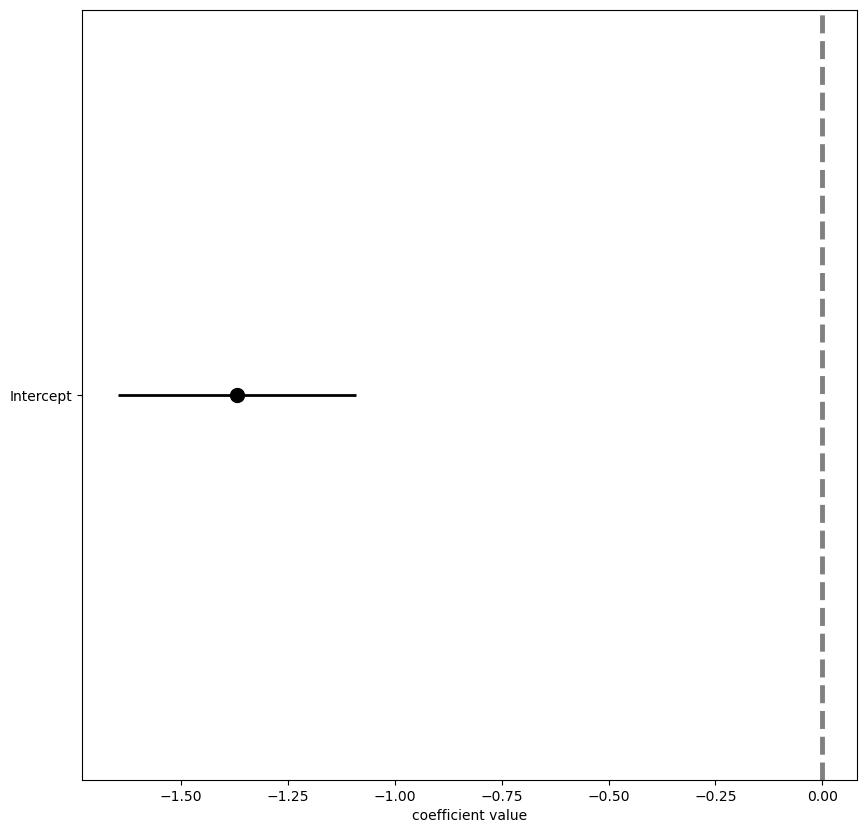

In [163]:
my_coefplot(fit_00)

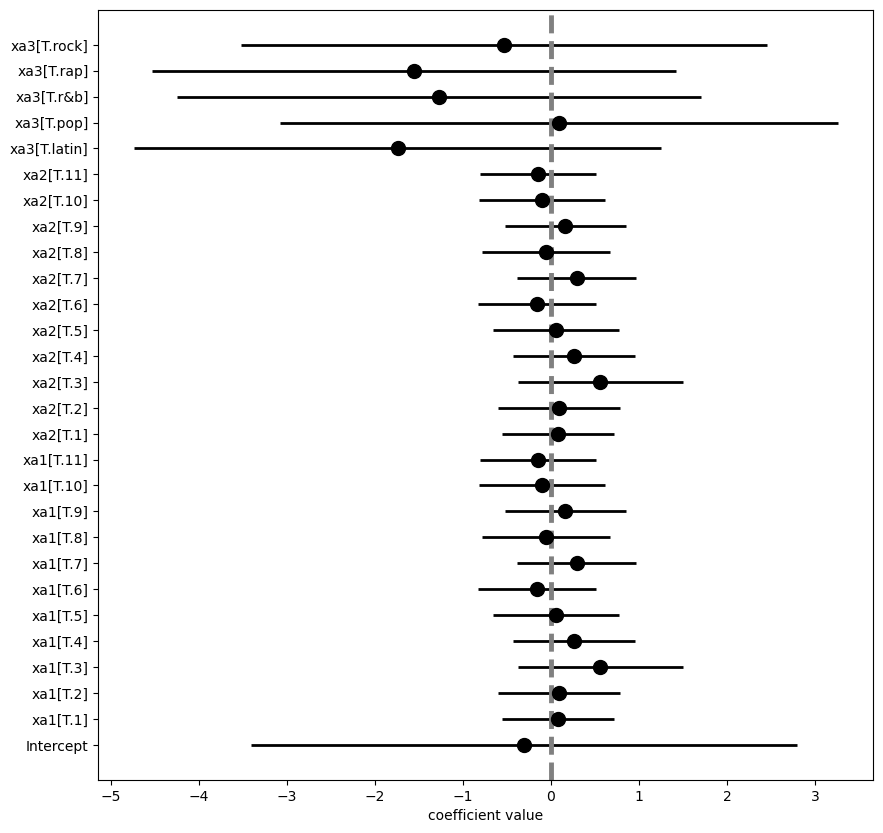

In [164]:
my_coefplot(fit_01)

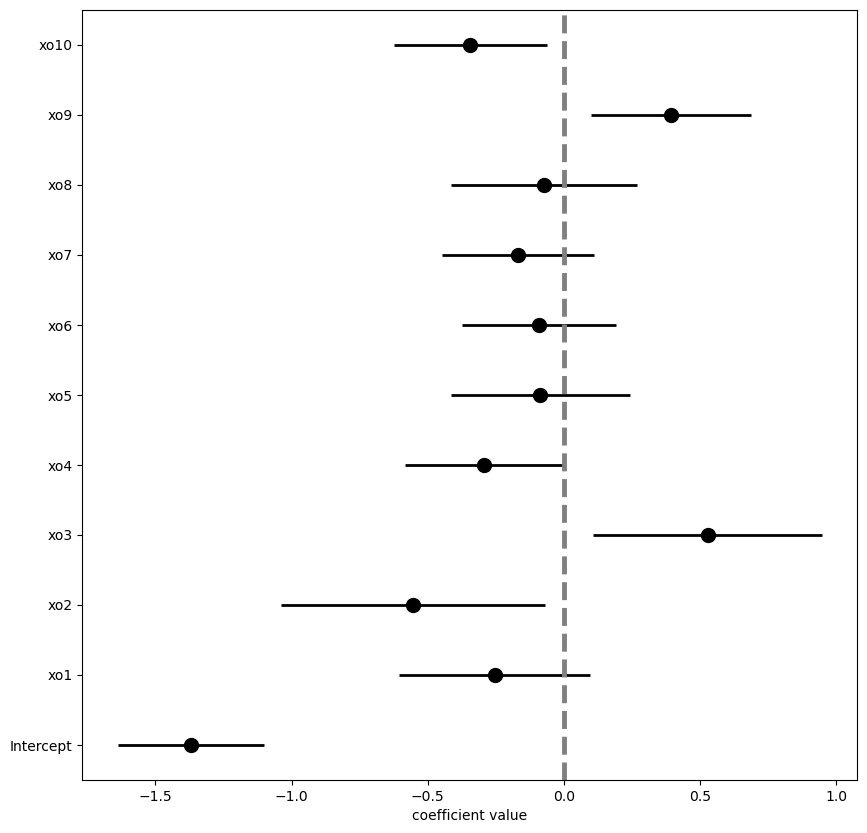

In [165]:
my_coefplot(fit_02)

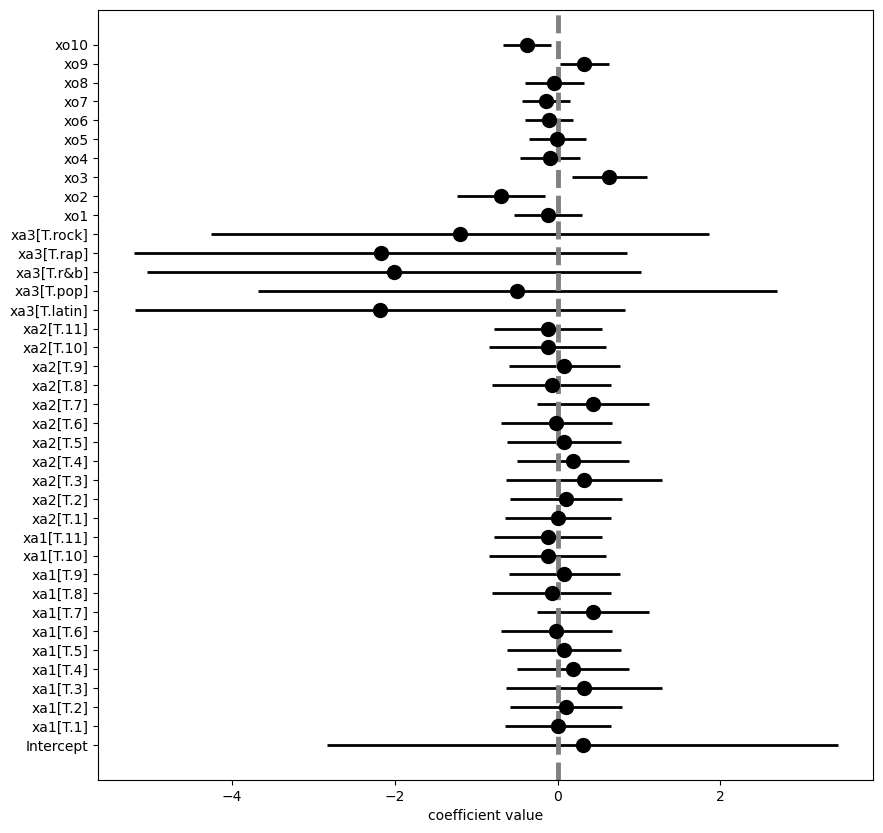

In [166]:
my_coefplot(fit_03)

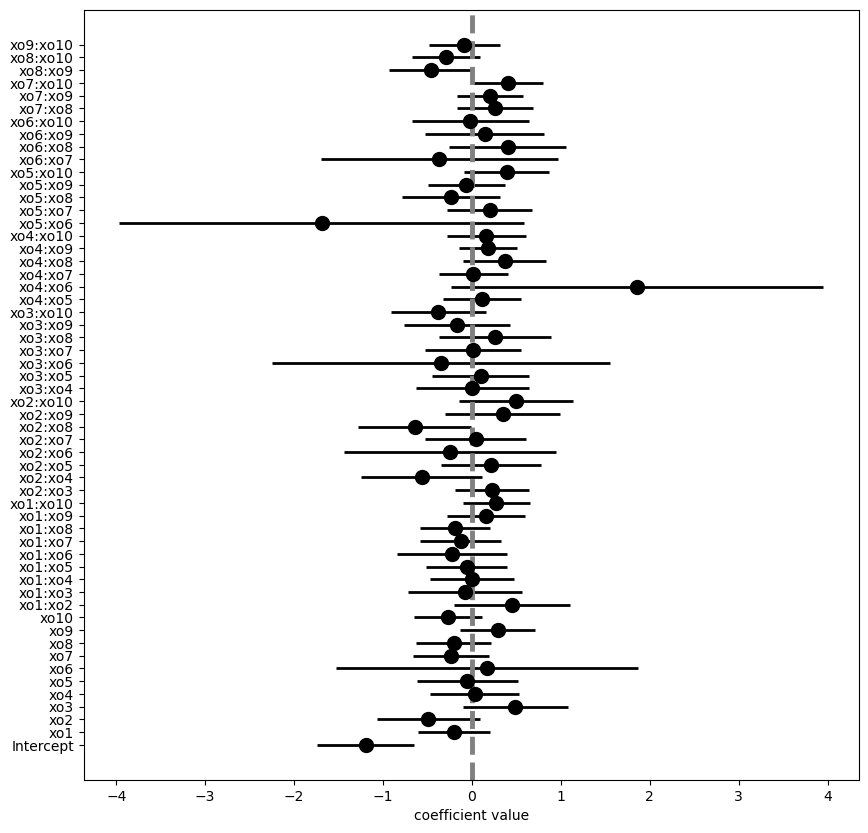

In [167]:
my_coefplot(fit_04)

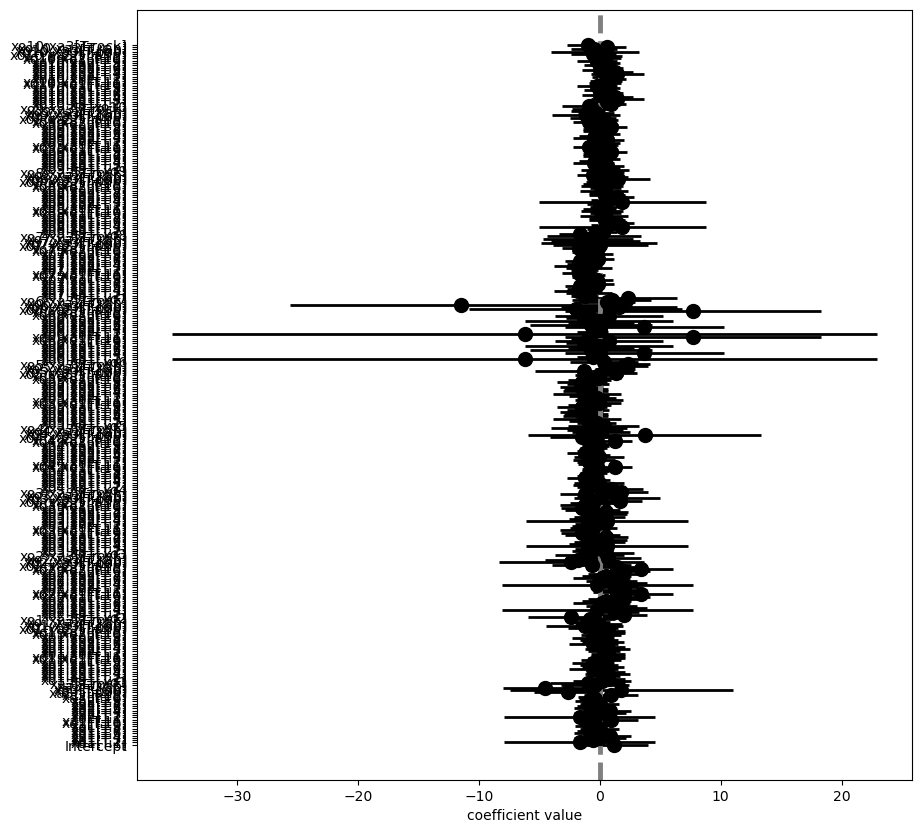

In [168]:
my_coefplot(fit_05)

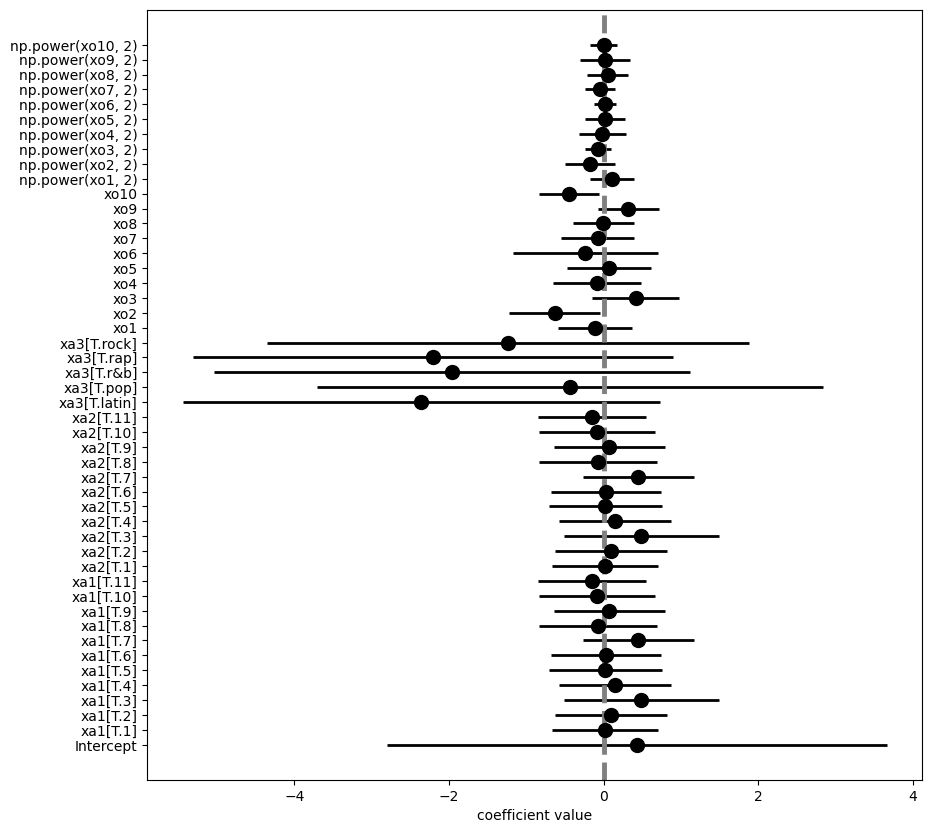

In [169]:
my_coefplot(fit_06)

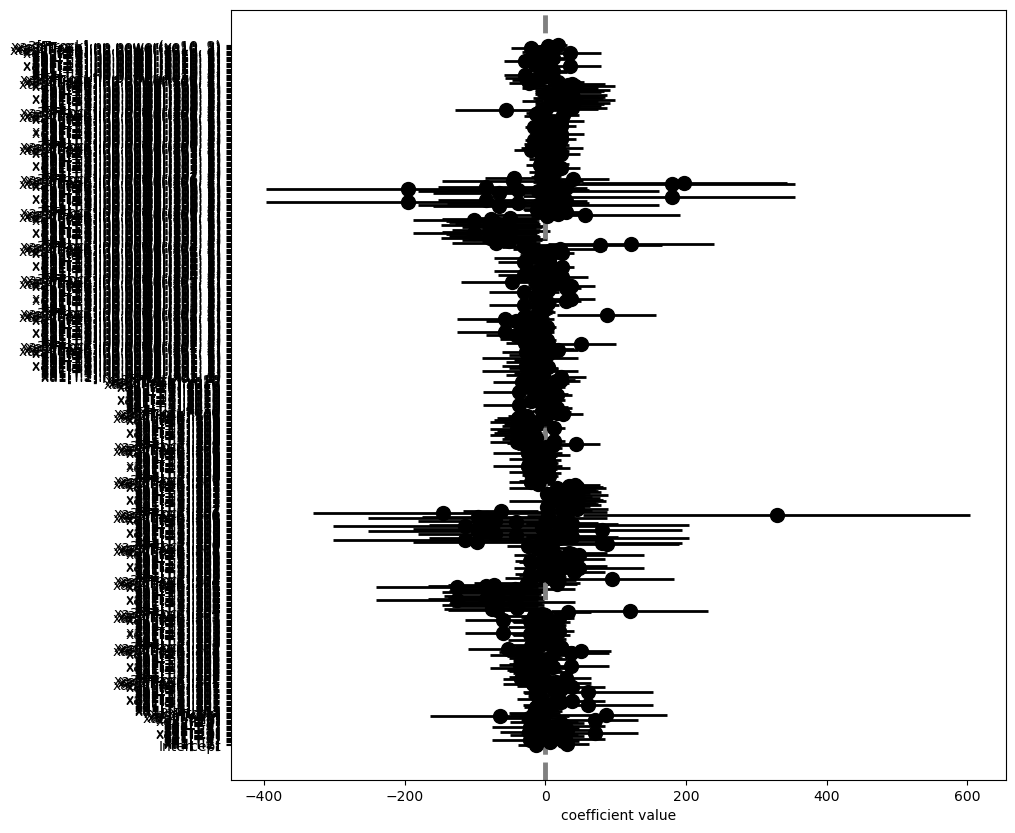

In [170]:
my_coefplot(fit_07)

### For each model that you fit you must show the performance on the training set. 

1.For each model show the predicted vs observed figure for the training set, and the R-squared and RMSE on the training set.

In [173]:
def my_pred_obs_plot(mod, figsize_use=(10,4)):
    df5_y = df5_new.loc[:,['y']].copy()
    df5_y['fitted'] = mod.fittedvalues
    fig, ax=plt.subplots(figsize = figsize_use)
    sns.scatterplot(data=df5_y, x='y', y='fitted', s=50, ax=ax)
    plt.show()

In [174]:
df5_y = df5_new.loc[:,['y']].copy()

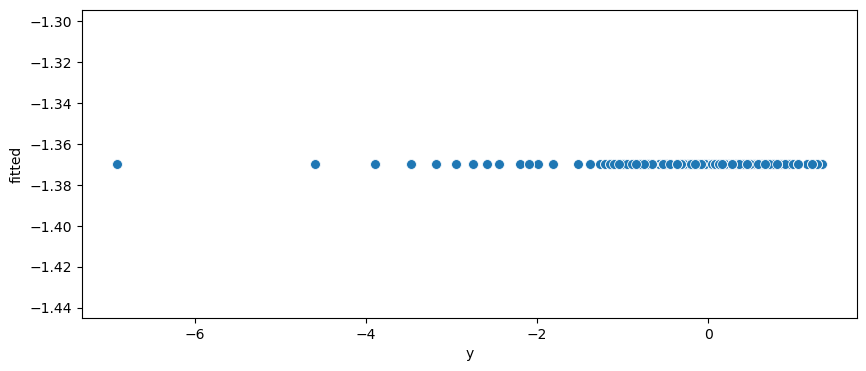

In [175]:
my_pred_obs_plot(fit_00)

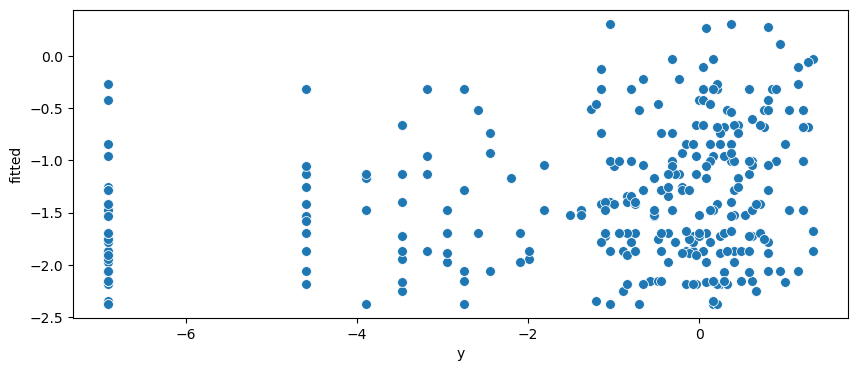

In [176]:
my_pred_obs_plot(fit_01)

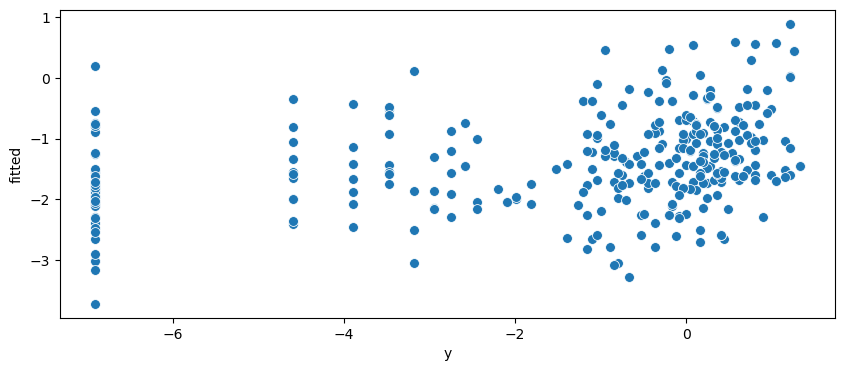

In [177]:
my_pred_obs_plot(fit_02)

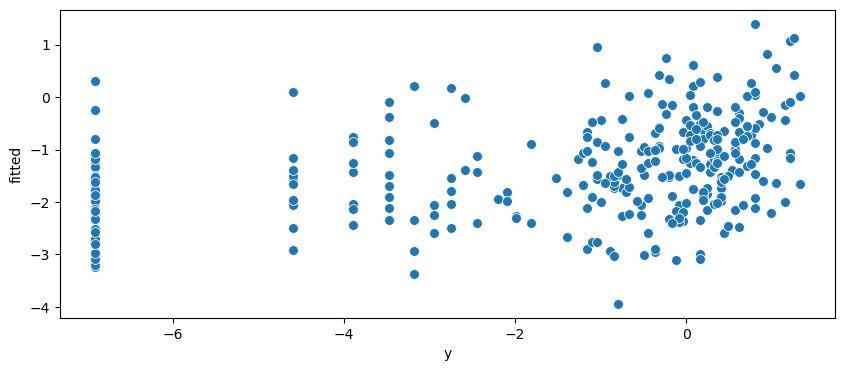

In [178]:
my_pred_obs_plot(fit_03)

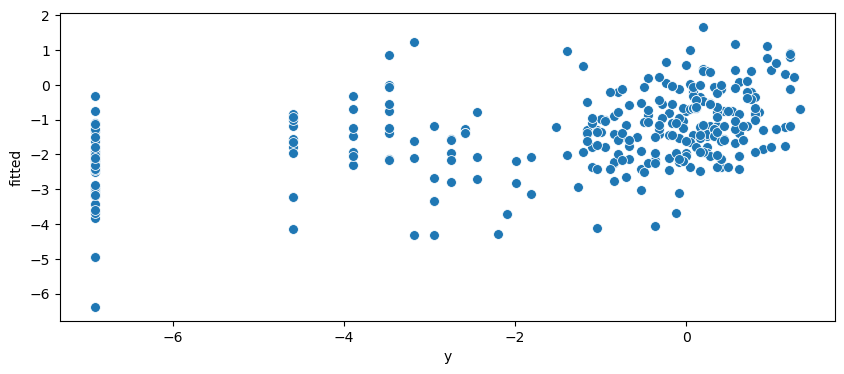

In [179]:
my_pred_obs_plot(fit_04)

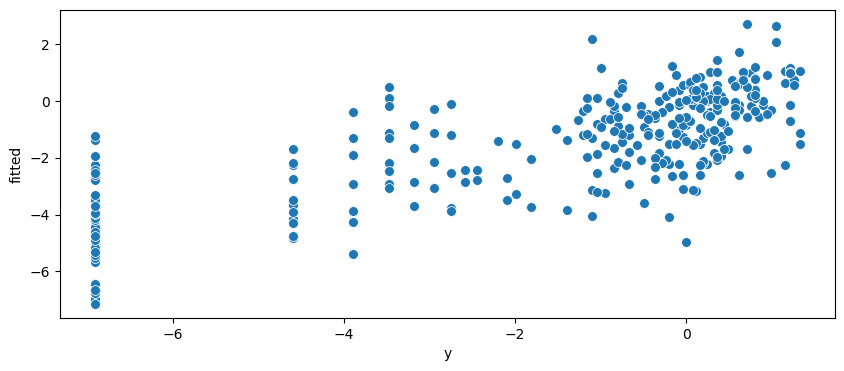

In [180]:
my_pred_obs_plot(fit_05)

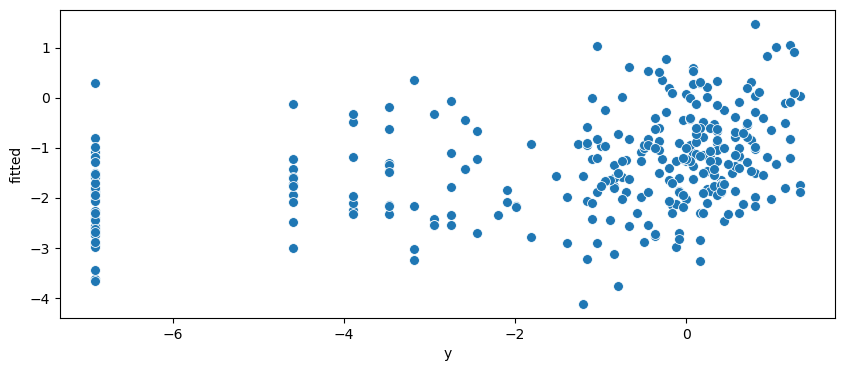

In [181]:
my_pred_obs_plot(fit_06)

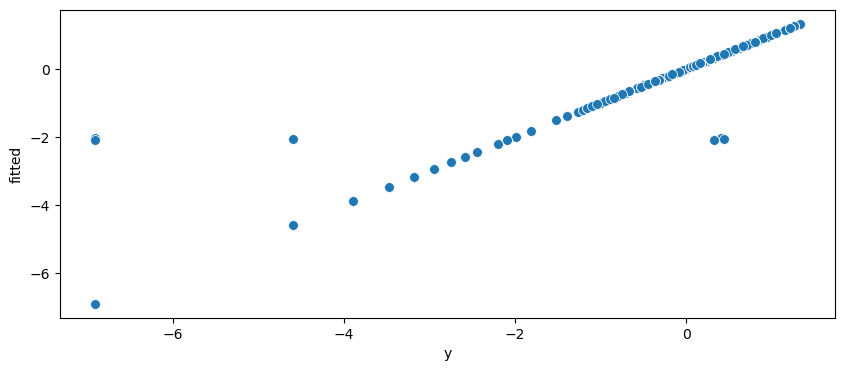

In [182]:
my_pred_obs_plot(fit_07)

### Performance metric

In [183]:
def fit_and_assess_ols(mod_name, a_formula, the_data):
    a_mod = smf.ols(formula=a_formula, data=the_data).fit()
    res_dict = {'model_name':mod_name,
                'model_formula':a_formula,
               'num_coefs':len(a_mod.params),
               'R-squared':a_mod.rsquared,
               'RMSE':np.sqrt((a_mod.resid ** 2).mean())}
    return pd.DataFrame(res_dict, index=[0])

In [184]:
fit_and_assess_ols(0,formula_list[0], df5_new)

,model_name,model_formula,num_coefs,R-squared,RMSE
0,0,y ~ 1,1,0.0,2.519164


In [185]:
#apply to all formulas:

ols_results_list = []

for m in range(len(formula_list)):
    ols_results_list.append(fit_and_assess_ols(m, formula_list[m], df5_new))

In [186]:
#combine all model results together
ols_results_df = pd.concat(ols_results_list, ignore_index=True)

In [187]:
ols_results_df

,model_name,model_formula,num_coefs,R-squared,RMSE
0,0,y ~ 1,1,0.000000,2.519164
1,1,y ~ xa1 + xa2 + xa3,28,0.063357,2.438055
2,2,y ~ xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + ...,11,0.095695,2.395598
3,3,y ~ xa1 + xa2 + xa3 + xo1 + xo2 + xo3 + xo4 + ...,38,0.135581,2.342171
4,4,y ~ (xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 +...,56,0.216473,2.229890
5,5,y ~ (xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 +...,308,0.538940,1.710547
6,6,y ~ (xa1 + xa2 + xa3) + (xo1 + xo2 + xo3 + xo4...,48,0.150192,2.322292
7,7,y ~ (xa1 + xa2 + xa3) * (xo1 + xo2 + xo3 + xo4...,588,0.960028,0.503654


In [188]:
ols_results_df.sort_values(by=['R-squared'],ascending=False)

,model_name,model_formula,num_coefs,R-squared,RMSE
7,7,y ~ (xa1 + xa2 + xa3) * (xo1 + xo2 + xo3 + xo4...,588,0.960028,0.503654
5,5,y ~ (xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 +...,308,0.538940,1.710547
4,4,y ~ (xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 +...,56,0.216473,2.229890
6,6,y ~ (xa1 + xa2 + xa3) + (xo1 + xo2 + xo3 + xo4...,48,0.150192,2.322292
3,3,y ~ xa1 + xa2 + xa3 + xo1 + xo2 + xo3 + xo4 + ...,38,0.135581,2.342171
2,2,y ~ xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + ...,11,0.095695,2.395598
1,1,y ~ xa1 + xa2 + xa3,28,0.063357,2.438055
0,0,y ~ 1,1,0.000000,2.519164


In [189]:
ols_results_df.sort_values(by=['RMSE'],ascending=True)

,model_name,model_formula,num_coefs,R-squared,RMSE
7,7,y ~ (xa1 + xa2 + xa3) * (xo1 + xo2 + xo3 + xo4...,588,0.960028,0.503654
5,5,y ~ (xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 +...,308,0.538940,1.710547
4,4,y ~ (xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 +...,56,0.216473,2.229890
6,6,y ~ (xa1 + xa2 + xa3) + (xo1 + xo2 + xo3 + xo4...,48,0.150192,2.322292
3,3,y ~ xa1 + xa2 + xa3 + xo1 + xo2 + xo3 + xo4 + ...,38,0.135581,2.342171
2,2,y ~ xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + ...,11,0.095695,2.395598
1,1,y ~ xa1 + xa2 + xa3,28,0.063357,2.438055
0,0,y ~ 1,1,0.000000,2.519164


2.Which model has the best performance on the training set? Is the best model according to R-squared the SAME as the best model according to RMSE? Is the best model better than the INTERCEPT-ONLY model? How many coefficients are associated with the BEST model?

**model 7 is the best.**

Yes, the best model according to R-squared are the SAME as the best model according to RMSE.

Yes, the best model better than the INTERCEPT-ONLY model.

588 coefficients are associated with the best model.

# E. Models: Predicitions

In [190]:
# the model with ALL inputs and linear additive features.
formula_list[3]

'y ~ xa1 + xa2 + xa3 + xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + xo8 + xo9 + xo10'

In [191]:
# the best model on the training set
formula_list[7]

'y ~ (xa1 + xa2 + xa3) * (xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + xo8 + xo9 + xo10 + np.power(xo1,2) +  np.power(xo2,2) + np.power(xo3,2) + np.power(xo4,2) + np.power(xo5,2) + np.power(xo6,2) + np.power(xo7,2) + np.power(xo8,2) + np.power(xo9,2) + np.power(xo10,2))'

## grid 1

You must identify the continuous input that you feel is the MOST important based on the statistically significant coefficients in your models. 

Judge which of xo2 and xo3 is the most important input.

In [192]:
fit_xo2_xo3 = smf.ols(formula ='y ~ xo2 + xo3', data=df5_new).fit()

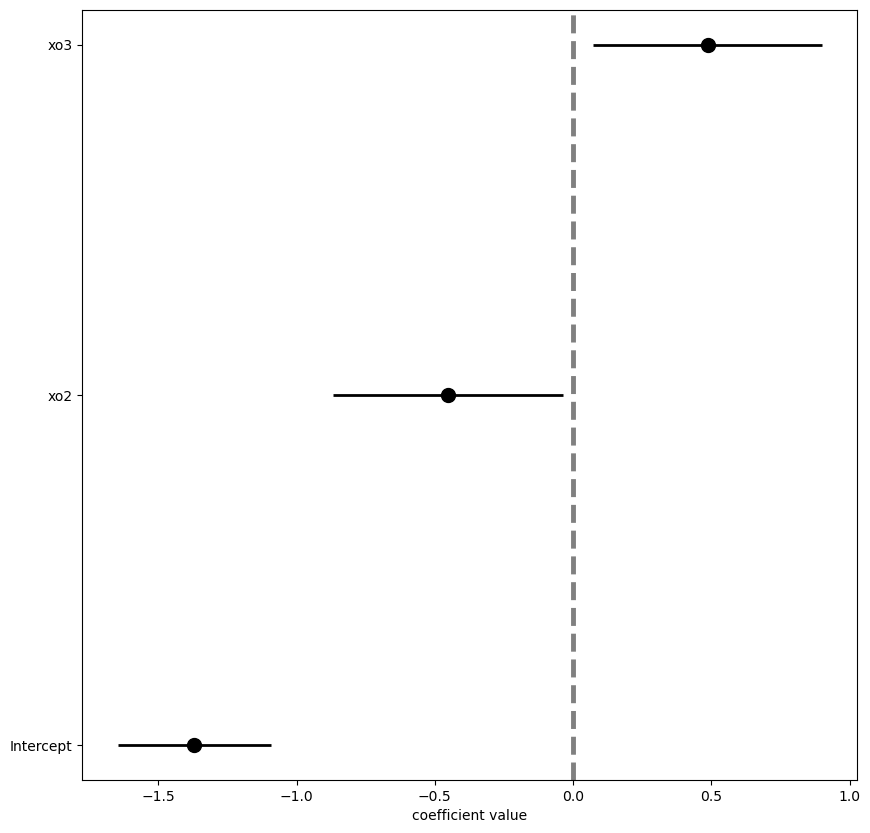

In [193]:
my_coefplot(fit_xo2_xo3)

In [194]:
fit_xo2_xo3.conf_int()

,0,1
Intercept,-1.642103,-1.097224
xo2,-0.859684,-0.043477
xo3,0.077954,0.894160


Therefore, xo3 as the most import continuous variable.

1.The MOST important input must have 101 unique values between the minimum and maximum training set values.

2.ALL other inputs must be set to CONSTANT values. Continuous inputs should use a CENTRAL value like the MEAN or MEDIAN. Categorical inputs should use the MOST frequent category.

In [195]:
input_grid = pd.DataFrame({'xo3' : np.linspace(df5_new.xo3.min(), df5_new.xo3.max(), num=101)})

In [196]:
input_grid['xo1'] = df5_new.xo1.mean()

In [197]:
input_grid['xo2'] = df5_new.xo2.mean()

In [198]:
input_grid['xo4'] = df5_new.xo4.mean()

In [199]:
input_grid['xo5'] = df5_new.xo5.mean()

In [200]:
input_grid['xo6'] = df5_new.xo6.mean()

In [201]:
input_grid['xo7'] = df5_new.xo7.mean()

In [202]:
input_grid['xo8'] = df5_new.xo8.mean()

In [203]:
input_grid['xo9'] = df5_new.xo9.mean()

In [204]:
input_grid['xo10'] = df5_new.xo10.mean()

In [205]:
input_grid['xa3'] = df5_new.xa3.value_counts().idxmax()

In [206]:
input_grid['xa1'] = df5_new.xa1.value_counts().idxmax()

In [207]:
input_grid['xa2'] = df5_new.xa2.value_counts().idxmax()

In [208]:
input_grid

,xo3,xo1,xo2,xo4,xo5,xo6,xo7,xo8,xo9,xo10,xa3,xa1,xa2
0,-6.037331,-5.415722e-18,-9.883693e-17,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,rap,1,1
1,-5.959835,-5.415722e-18,-9.883693e-17,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,rap,1,1
2,-5.882340,-5.415722e-18,-9.883693e-17,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,rap,1,1
3,-5.804844,-5.415722e-18,-9.883693e-17,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,rap,1,1
4,-5.727349,-5.415722e-18,-9.883693e-17,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,rap,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.402232,-5.415722e-18,-9.883693e-17,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,rap,1,1
97,1.479728,-5.415722e-18,-9.883693e-17,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,rap,1,1
98,1.557223,-5.415722e-18,-9.883693e-17,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,rap,1,1
99,1.634719,-5.415722e-18,-9.883693e-17,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,rap,1,1


In [209]:
input_grid.nunique()

xo3     101
xo1       1
xo2       1
xo4       1
xo5       1
xo6       1
xo7       1
xo8       1
xo9       1
xo10      1
xa3       1
xa1       1
xa2       1
dtype: int64

Make predictions with BOTH models on the visualization grid. You MUST visualize the AVERAGE OUTPUT as a line, the CONFIDENCE INTERVAL as a grey ribbon, and the PREDICTION INTERVAL as an orange ribbon with respect to the most important input. 

In [210]:
pred_summary_03 = fit_03.get_prediction(input_grid).summary_frame()

In [211]:
pred_summary_07 = fit_07.get_prediction(input_grid).summary_frame()

In [212]:
pred_summary_03.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-5.695331,1.601711,-8.847301,-2.543361,-11.447229,0.056568
1,-5.646030,1.584772,-8.764665,-2.527395,-11.379729,0.087669
2,-5.596729,1.567854,-8.682071,-2.511387,-11.312388,0.118930
3,-5.547428,1.550957,-8.599520,-2.495336,-11.245207,0.150351
4,-5.498127,1.534083,-8.517013,-2.479241,-11.178188,0.181934


In [213]:
pred_summary_07.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,261.858156,490.585850,-758.370971,1282.087282,-758.379369,1282.095680
1,256.809651,478.723186,-738.749715,1252.369017,-738.758321,1252.377622
2,251.815892,467.009312,-719.383140,1223.014924,-719.391961,1223.023745
3,246.876879,455.444284,-700.271360,1194.025119,-700.280405,1194.034164
4,241.992613,444.028161,-681.414498,1165.399724,-681.423776,1165.409002


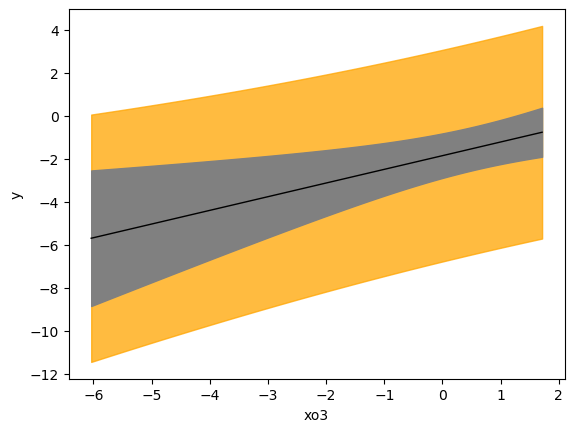

In [214]:
fig, ax = plt.subplots()

# prediction interval
ax.fill_between(input_grid.xo3,
               pred_summary_03.obs_ci_lower,
               pred_summary_03.obs_ci_upper,
               facecolor='orange', alpha=0.75, edgecolor='orange')
#confidence interval
ax.fill_between(input_grid.xo3,
               pred_summary_03.mean_ci_lower,
               pred_summary_03.mean_ci_upper,
               facecolor='grey',edgecolor='grey')
#trend
ax.plot(input_grid.xo3, pred_summary_03['mean'], color='k', linewidth=1)

#set labels
ax.set_xlabel('xo3')
ax.set_ylabel('y')

plt.show()

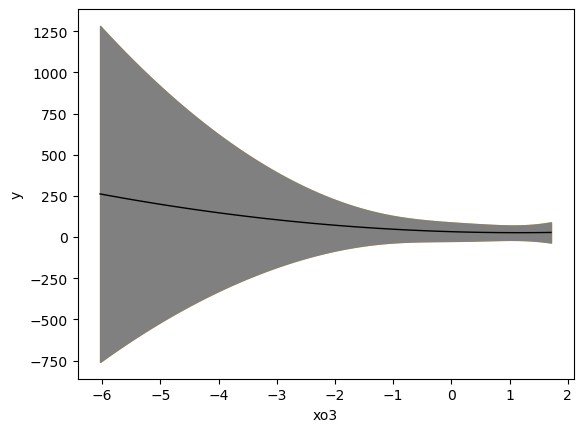

In [215]:
fig, ax = plt.subplots()

# prediction interval
ax.fill_between(input_grid.xo3,
               pred_summary_07.obs_ci_lower,
               pred_summary_07.obs_ci_upper,
               facecolor='orange', alpha=0.75, edgecolor='orange')
#confidence interval
ax.fill_between(input_grid.xo3,
               pred_summary_07.mean_ci_lower,
               pred_summary_07.mean_ci_upper,
               facecolor='grey',edgecolor='grey')
#trend
ax.plot(input_grid.xo3, pred_summary_07['mean'], color='k', linewidth=1)

#set labels
ax.set_xlabel('xo3')
ax.set_ylabel('y')

plt.show()

**Comment**: trends are different between the two models based on the same input xo3. xo3 in model_03 is an positive coef while slightly negative in model_07. The predictions and confidence intervals are both wider in model_07, indicating more uncertainty in the estimated mean response.

## grid 2

Choose xo2, xo3, xa3 as inputs.

In [216]:
input_grid2 = pd.DataFrame([(xo3n, xo2n)  for xo3n in np.linspace(df5_new.xo3.min(), df5_new.xo3.max(), num=101)
                                       for xo2n in np.linspace(df5_new.xo2.min(), df5_new.xo2.max(), num=5)],
                           columns=['xo3n','xo2n'])

In [217]:
xa3n = df5_new.xa3.unique()

In [218]:
viz_grid2 = pd.DataFrame({'xo3' : np.repeat(input_grid2.xo3n,len(xa3n)),
                         'xo2' : np.repeat(input_grid2.xo2n,len(xa3n)),
                         'xa3' : np.tile(xa3n,len(input_grid2.xo3n))})

In [219]:
viz_grid2.nunique()

xo3    101
xo2      5
xa3      6
dtype: int64

In [220]:
viz_grid2['xo1'] = df5_new.xo1.mean()

In [221]:
viz_grid2['xo4'] = df5_new.xo4.mean()

In [222]:
viz_grid2['xo5'] = df5_new.xo5.mean()

In [223]:
viz_grid2['xo6'] = df5_new.xo6.mean()

In [224]:
viz_grid2['xo7'] = df5_new.xo7.mean()

In [225]:
viz_grid2['xo8'] = df5_new.xo8.mean()

In [226]:
viz_grid2['xo9'] = df5_new.xo9.mean()

In [227]:
viz_grid2['xo10'] = df5_new.xo10.mean()

In [228]:
viz_grid2['xa1'] =  df5_new.xa1.value_counts().idxmax()

In [229]:
viz_grid2['xa2'] =  df5_new.xa2.value_counts().idxmax()

In [230]:
viz_grid2

,xo3,xo2,xa3,xo1,xo4,xo5,xo6,xo7,xo8,xo9,xo10,xa1,xa2
0,-6.037331,-3.645383,r&b,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1
0,-6.037331,-3.645383,rock,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1
0,-6.037331,-3.645383,rap,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1
0,-6.037331,-3.645383,latin,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1
0,-6.037331,-3.645383,edm,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1.712214,1.608127,rock,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1
504,1.712214,1.608127,rap,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1
504,1.712214,1.608127,latin,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1
504,1.712214,1.608127,edm,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1


In [231]:
viz_grid2.nunique()

xo3     101
xo2       5
xa3       6
xo1       1
xo4       1
xo5       1
xo6       1
xo7       1
xo8       1
xo9       1
xo10      1
xa1       1
xa2       1
dtype: int64

In [232]:
viz_grid2['pred03'] = fit_03.predict(viz_grid2)

In [233]:
viz_grid2['pred07'] = fit_07.predict(viz_grid2)

In [234]:
viz_grid2

,xo3,xo2,xa3,xo1,xo4,xo5,xo6,xo7,xo8,xo9,xo10,xa1,xa2,pred03,pred07
0,-6.037331,-3.645383,r&b,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1,-2.991439,92.668548
0,-6.037331,-3.645383,rock,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1,-2.181187,-1066.974591
0,-6.037331,-3.645383,rap,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1,-3.156076,89.381058
0,-6.037331,-3.645383,latin,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1,-3.158265,-298.129955
0,-6.037331,-3.645383,edm,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1,-0.982070,-418.706528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1.712214,1.608127,rock,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1,-0.910516,-87.634972
504,1.712214,1.608127,rap,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1,-1.885405,-0.145164
504,1.712214,1.608127,latin,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1,-1.887593,-33.475674
504,1.712214,1.608127,edm,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1,0.288602,-45.670132


C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


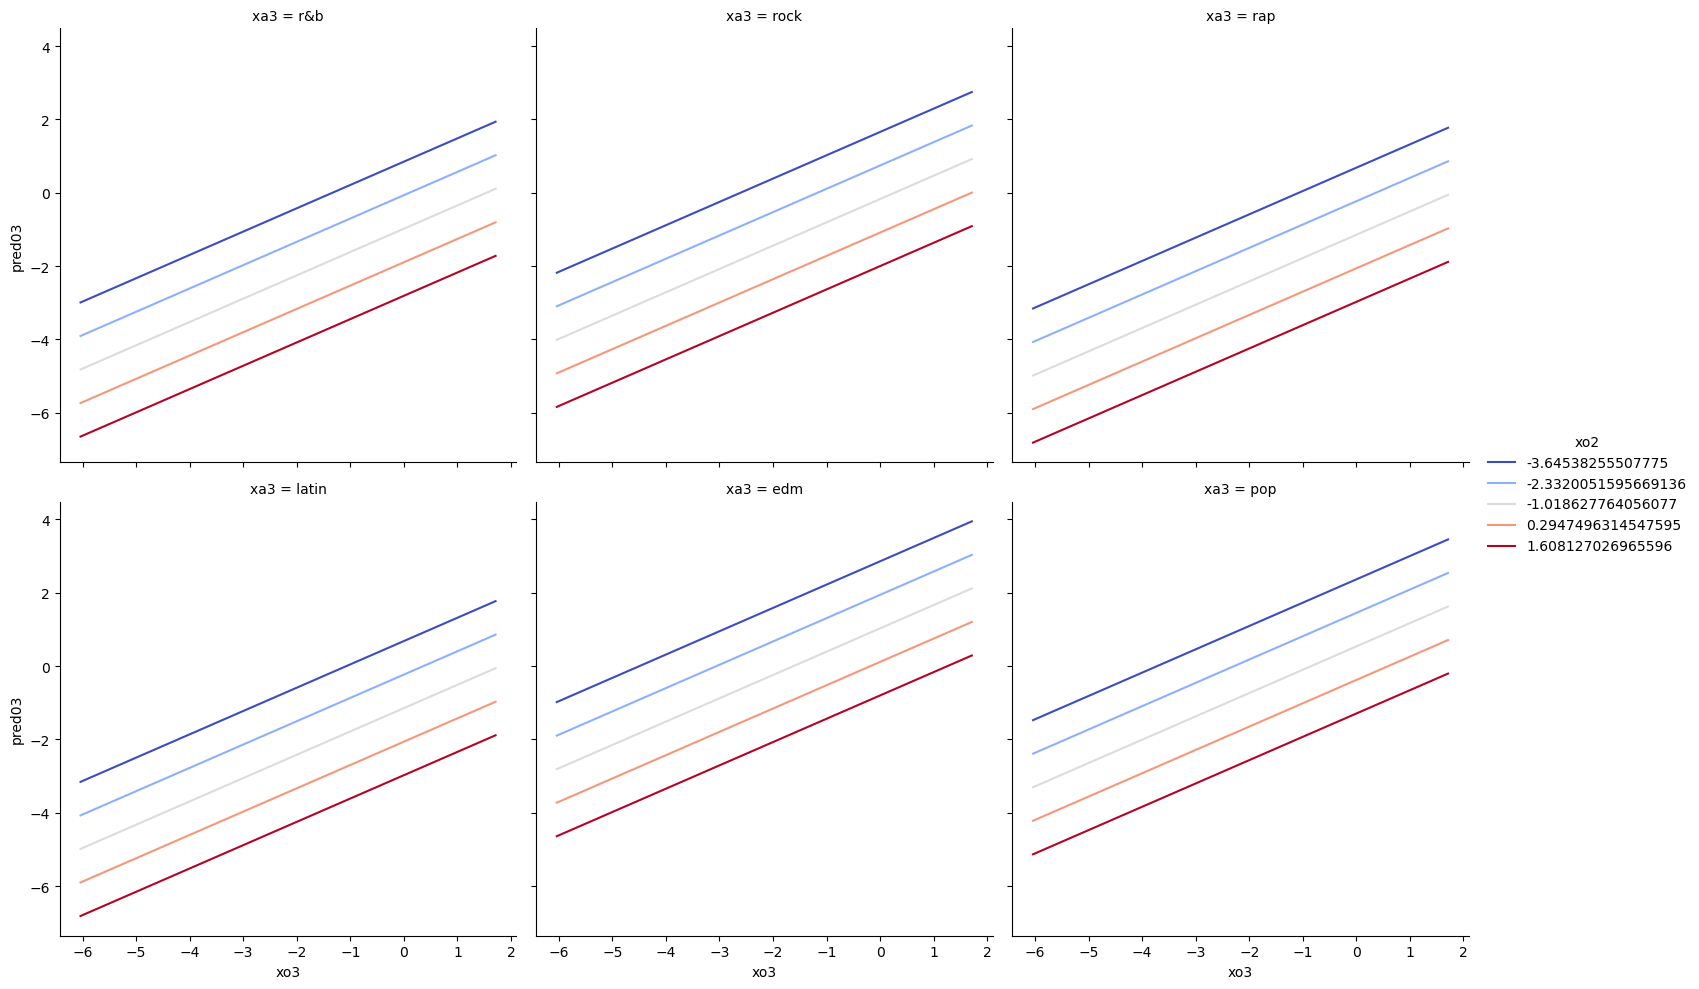

In [235]:
sns.relplot(data=viz_grid2,
           x='xo3', y = 'pred03', kind='line',
           hue='xo2',palette='coolwarm',col='xa3', col_wrap=3,
           estimator=None, units='xo2')
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


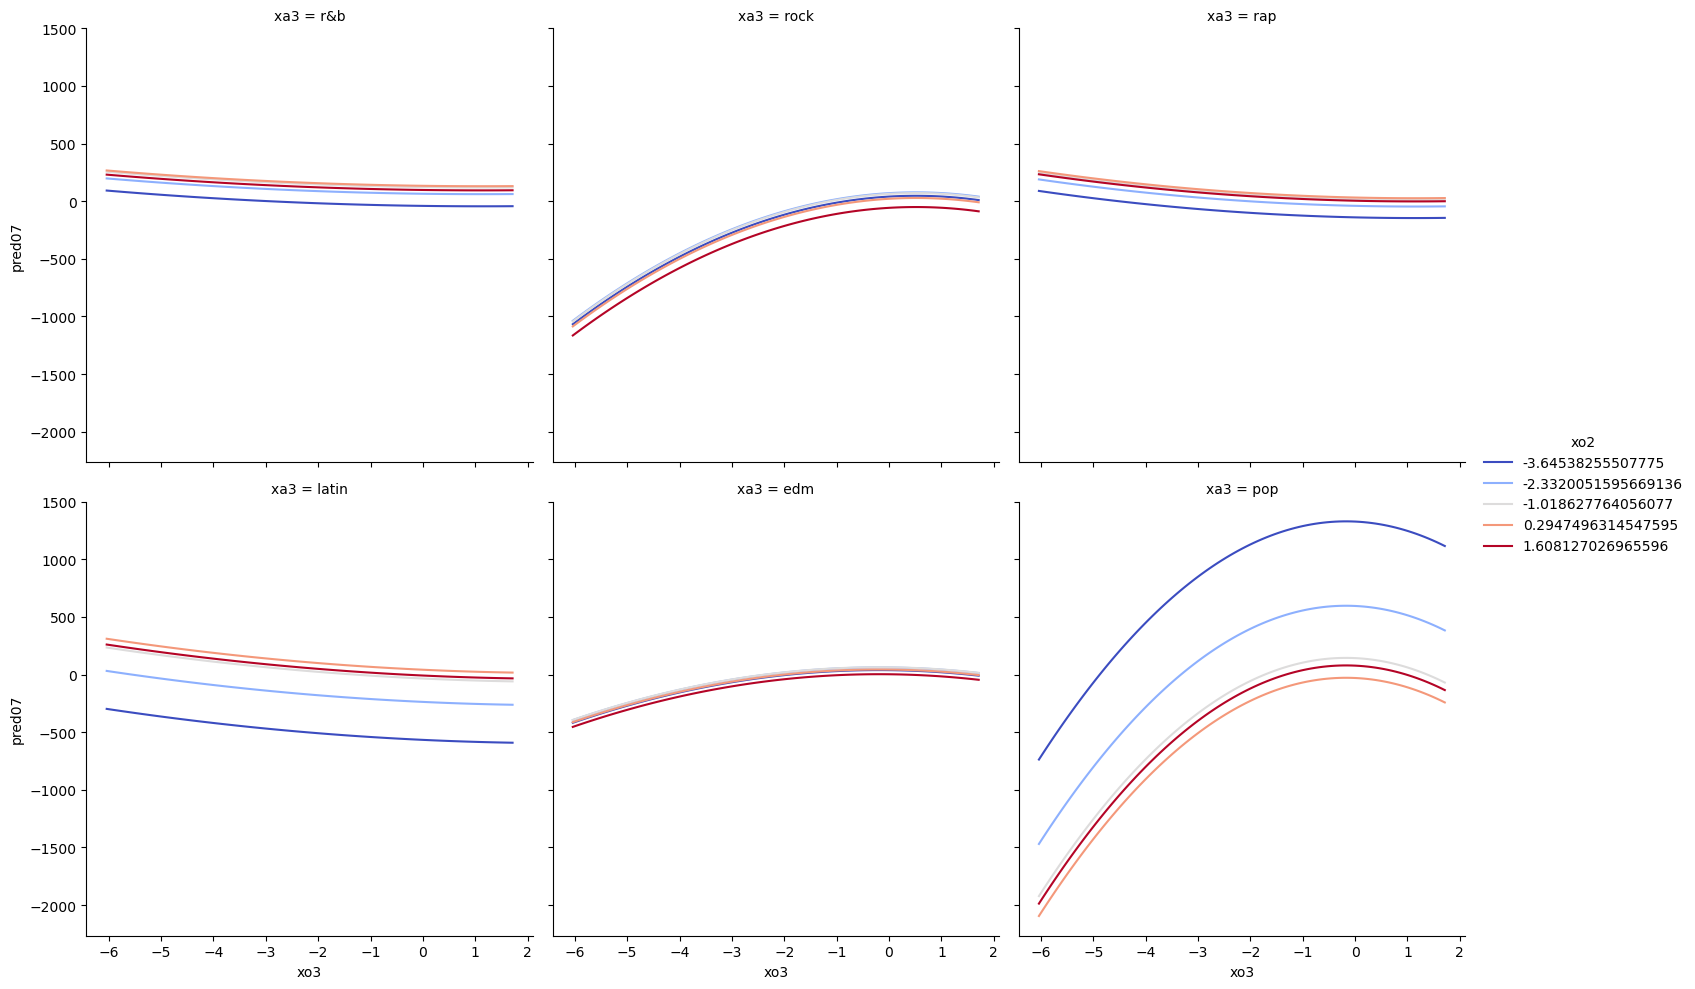

In [236]:
sns.relplot(data=viz_grid2,
           x='xo3', y = 'pred07', kind='line',
           hue='xo2',palette='coolwarm',col='xa3', col_wrap=3,
           estimator=None, units='xo2')
plt.show()

**Trends**: In Model 03, predictions have more solid trends on variable xo3, xo3 and xo2 are linear additive features. Additionally, different categories of xa3 has different effect on the trends. In model 07, the trends are not obvious on xo3, xo2 and xa3.

**Uncertainty**: I think model 07 has higher prediction uncertainty than model 03.

# F. Model performance and validation

Select **model 7** since the formulation that was the best model on the training set. 
Choose **model 2 and model 6** as 2 additional formulations. model 2 is simple (few features), and model 6 is of medium to high complexity
.

In [237]:
df5_new

,xo1,xo2,xo3,xo4,xo5,xo6,xo7,xo8,xo9,xo10,xa1,xa2,xa3,y
0,0.228518,-1.013955,-0.767625,-0.943733,1.303515,-0.210842,2.187045,-0.936229,0.028455,0.059377,9,9,r&b,-0.200671
1,-0.453146,0.101941,0.358667,-0.675642,-0.611601,-0.210842,-0.679626,-2.274030,-0.933172,1.500060,1,1,rock,0.281851
2,-0.703672,-0.244371,-1.458995,0.768784,-0.788545,0.190331,-0.309733,-0.338908,1.453963,-0.317121,4,4,rock,0.200671
3,-0.703672,-0.244371,-1.458995,0.768784,-0.788545,0.190331,-0.309733,-0.338908,1.453963,-0.317121,4,4,rock,0.200671
4,-0.849326,0.827549,0.563381,1.533530,0.529784,-0.210842,-0.053654,0.821178,0.976431,0.724371,4,4,rap,-0.847298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,-1.519337,1.234329,0.673867,-0.704857,-0.812472,-0.180955,-0.466227,-0.723958,-0.779263,-0.416850,9,9,rock,0.800119
324,1.114098,0.266852,-0.188220,-0.159224,-0.694844,4.214700,-0.082107,-1.642153,-0.719894,-0.723362,2,2,rap,-0.160343
325,-0.820195,0.613165,0.877472,-0.709154,-0.503279,-0.210842,-0.437773,0.776749,-0.974514,-0.612667,2,2,pop,0.160343
326,-2.218480,-0.189401,-0.296489,-0.878429,-0.798043,-0.170035,-0.614895,-1.686582,0.251595,0.692511,11,11,rock,-3.891820


In [238]:
from sklearn.model_selection import KFold

In [239]:
from sklearn.linear_model import LinearRegression

In [240]:
from sklearn.model_selection import cross_val_score

In [241]:
from patsy import dmatrices

Choose **10-fold** using regular k-fold.

Use **R-squared** and **RMSE** as performance metric.

In [242]:
kf = KFold(n_splits=10, shuffle=True, random_state=101)

In [243]:
kf.get_n_splits()

10

In [244]:
sk_lm = LinearRegression(fit_intercept=False)

In [245]:
def lm_cross_val_score(mod_name, a_formula, init_mod, the_data, cv):
    #create features and output arrays
    y, X = dmatrices(a_formula, data=the_data)
    #train and test within each fold: return thest set scores
    ##rsquared
    test_r2 = cross_val_score(init_mod, X, y.ravel(), cv=cv)
    ##rmse
    test_rmse = -cross_val_score(init_mod, X, y.ravel(), cv=cv, scoring = 'neg_root_mean_squared_error')
    #book keeping
    res_df = pd.DataFrame({'R-squared': test_r2,
                         'RMSE': test_rmse})
    res_df['fold_id'] = res_df.index + 1
    res_df['model_name'] = mod_name
    res_df['model_formula'] = a_formula
    res_df['num_coefs'] = X.shape[1]
    return res_df

In [246]:
cv_score_list = []

In [247]:
cv_score_list.append(lm_cross_val_score(2,formula_list[2],init_mod=sk_lm, the_data=df5_new, cv=kf))

In [248]:
cv_score_list.append(lm_cross_val_score(6,formula_list[6],init_mod=sk_lm, the_data=df5_new, cv=kf))

In [249]:
cv_score_list.append(lm_cross_val_score(7,formula_list[7],init_mod=sk_lm, the_data=df5_new, cv=kf))

In [250]:
cv_score_df = pd.concat(cv_score_list, ignore_index=True)

In [251]:
cv_score_df

,R-squared,RMSE,fold_id,model_name,model_formula,num_coefs
0,-1.620704e-02,2.304654e+00,1,2,y ~ xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + ...,11
1,9.741837e-02,2.530741e+00,2,2,y ~ xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + ...,11
2,1.003722e-01,2.482046e+00,3,2,y ~ xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + ...,11
3,1.243057e-01,2.123039e+00,4,2,y ~ xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + ...,11
4,8.218282e-03,2.170871e+00,5,2,y ~ xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + ...,11
5,-2.219856e-01,2.034001e+00,6,2,y ~ xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + ...,11
6,3.974326e-03,2.532431e+00,7,2,y ~ xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + ...,11
7,-7.919117e-02,2.893148e+00,8,2,y ~ xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + ...,11
8,1.491614e-02,2.692573e+00,9,2,y ~ xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + ...,11
9,-1.139074e-01,2.966316e+00,10,2,y ~ xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + ...,11


Visualize the CROSS-VALIDATION results by showing the AVERAGE CROSS-VALIDATION performance metric with the 95% confidence interval for each model. 

C:\Users\russell\AppData\Local\Temp\ipykernel_16296\3196590551.py:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.catplot(data=cv_score_df, x='model_name', y='R-squared', kind='point', join=False, errorbar=('ci',95))
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


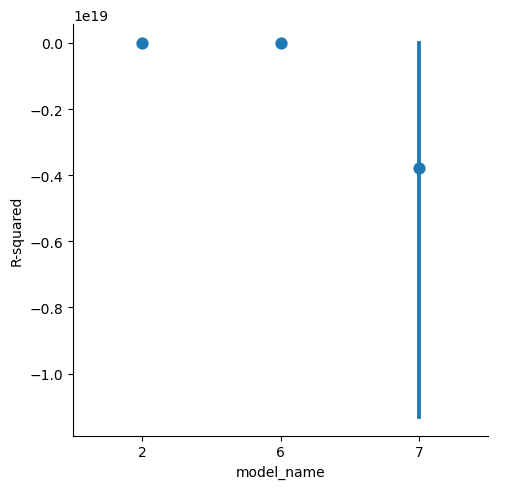

In [252]:
sns.catplot(data=cv_score_df, x='model_name', y='R-squared', kind='point', join=False, errorbar=('ci',95))
plt.show()

C:\Users\russell\AppData\Local\Temp\ipykernel_16296\1021815062.py:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.catplot(data=cv_score_df, x='model_name', y='RMSE', kind='point', join=False, errorbar=('ci',95))
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


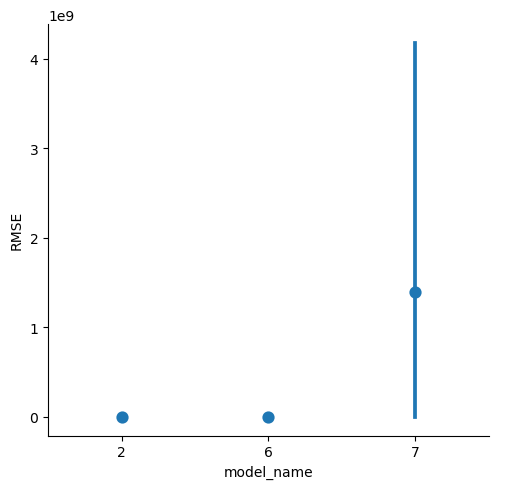

In [253]:
sns.catplot(data=cv_score_df, x='model_name', y='RMSE', kind='point', join=False, errorbar=('ci',95))
plt.show()

C:\Users\russell\AppData\Local\Temp\ipykernel_16296\2443661836.py:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.catplot(data=cv_score_df.loc[cv_score_df.model_name != 7,:], x='model_name', y='R-squared', kind='point', join=False, errorbar=('ci',95))
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


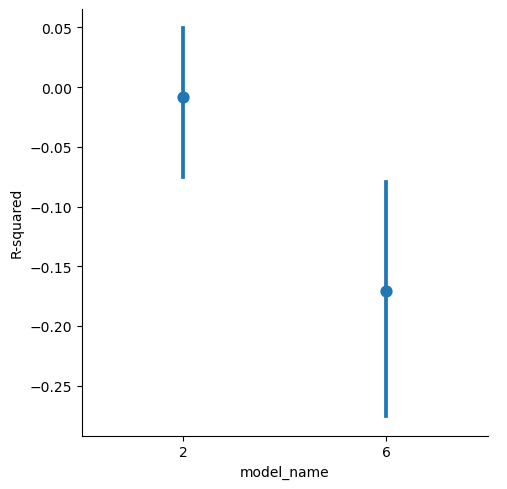

In [254]:
sns.catplot(data=cv_score_df.loc[cv_score_df.model_name != 7,:], x='model_name', y='R-squared', kind='point', join=False, errorbar=('ci',95))
plt.show()

C:\Users\russell\AppData\Local\Temp\ipykernel_16296\3448828944.py:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.catplot(data=cv_score_df.loc[cv_score_df.model_name != 7,:], x='model_name', y='RMSE', kind='point', join=False, errorbar=('ci',95))
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


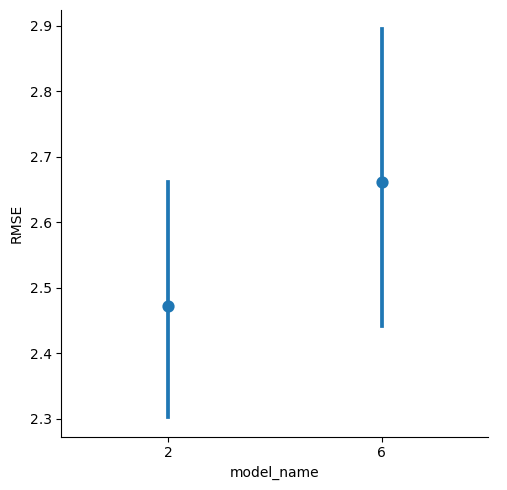

In [255]:
sns.catplot(data=cv_score_df.loc[cv_score_df.model_name != 7,:], x='model_name', y='RMSE', kind='point', join=False, errorbar=('ci',95))
plt.show()

C:\Users\russell\AppData\Local\Temp\ipykernel_16296\1646769289.py:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.catplot(data=cv_score_df.loc[cv_score_df.model_name != 7,:], x='model_name', y='R-squared', kind='point', join=False, errorbar=('ci',68))
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


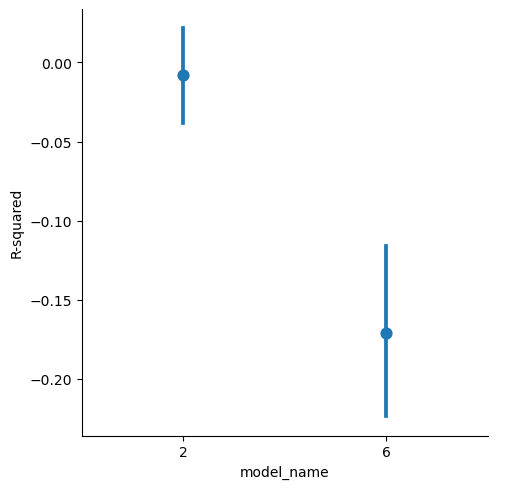

In [256]:
sns.catplot(data=cv_score_df.loc[cv_score_df.model_name != 7,:], x='model_name', y='R-squared', kind='point', join=False, errorbar=('ci',68))
plt.show()

C:\Users\russell\AppData\Local\Temp\ipykernel_16296\1947586138.py:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.catplot(data=cv_score_df.loc[cv_score_df.model_name != 7,:], x='model_name', y='RMSE', kind='point', join=False, errorbar=('ci',68))
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


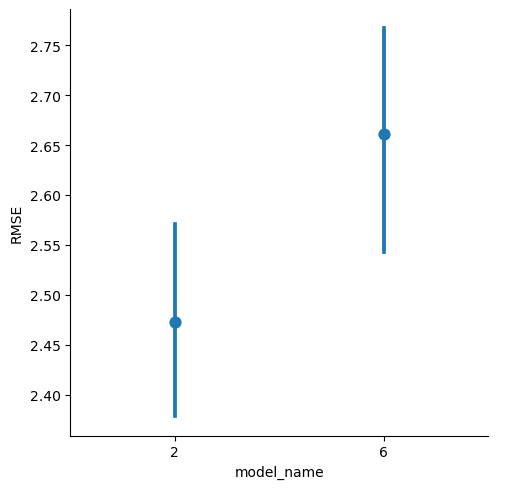

In [257]:
sns.catplot(data=cv_score_df.loc[cv_score_df.model_name != 7,:], x='model_name', y='RMSE', kind='point', join=False, errorbar=('ci',68))
plt.show()

In [258]:
len(fit_02.params)

11

In [259]:
fit_02.pvalues < 0.05

Intercept     True
xo1          False
xo2           True
xo3           True
xo4           True
xo5          False
xo6          False
xo7          False
xo8          False
xo9           True
xo10          True
dtype: bool

Model 2 is the BEST according to CROSS-VALIDATION, which is DIFFERENT from the model 7 identified as the BEST according to the training set.

11 regression coefiicients are assocaited with the best model, 6 of them (including intercept) are statistically significant.

The practice of cross-validation and also supplemental predictions away from the rest of the model lists could be found in the supplemental file.